In [22]:
from HaloUtils import DarkMatter,Galaxies,grylls19, Volume
from SizeUtils import K13Model
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15

plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['axes.titlepad'] = 10

plt.rcParams['font.size']=55
plt.rcParams['figure.figsize']=(12,16)

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# get data

In [2]:
from scipy.integrate import cumtrapz
cmodel = pd.read_csv('/home/lz1f17/PhD/data/SDSS/new_catalog_cModel.dat', sep=' ')
Header = ["galcount", "z", "Vmaxwt", "MsMendSerExp", "AbsMag", "logReSerExp", "BT", "n_bulge", "newLcentsat", "NewMCentSat", "newMhaloL", "probaE", "probaEll", "probaS0", "probaSab", "probaScd", "TType", "AbsMagCent", "MsCent", "veldisp", "veldisperr", "AbsModel_newKcorr", "LCentSat", "raSDSS7", "decSDSS7", "Z", "sSFR", "FLAGsSFR", "MEDIANsSFR", "P16sSFR", "P84sSRF", "SFR", "FLAGSFR", "MEDIANSFR", "P16SFR", "P84SRF", "RA_SDSS", "DEC_SDSS", "Z_2", "Seperation"]
df_SFR = pd.read_csv('~/PhD/data/SDSS/new_catalog_SFRs_Pip.dat', header = None, names = Header, delim_whitespace = True, skiprows = 1)

skycov=8000.
fracper = len(cmodel)/670722
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)


In [3]:
cmodel = cmodel.merge(df_SFR[['MEDIANsSFR','galcount']], on='galcount')

In [4]:
cmodel = cmodel.query(' MsMendCmodel>11.2 & Vmaxwt>0')
df_L = cmodel.query("MEDIANsSFR>-11")
df_E = cmodel.query("TType<0")
SMF_BinWidth = 0.05
SMF_Bins = np.arange(9,12.5,SMF_BinWidth)
bins = np.append(SMF_Bins, np.max(SMF_Bins)+SMF_BinWidth)-(SMF_BinWidth/2)
LTGs_SDSS = np.histogram(df_L['MsMendCmodel'], weights=df_L['Vmaxwt'],bins=SMF_Bins)[0]/fracsky/SMF_BinWidth
ETGs_SDSS = np.histogram(df_E['MsMendCmodel'], weights=df_E['Vmaxwt'],bins=SMF_Bins)[0]/fracsky/SMF_BinWidth

In [5]:
B = SMF_Bins[1:]-SMF_BinWidth/2
mask = np.ma.masked_greater(B,11.2-SMF_BinWidth/2,12).mask   #in data we choose 11.2

n_LTGs_SDSS = np.sum(LTGs_SDSS[mask])*0.05# cumtrapz(LTGs_SDSS[mask],B[mask])[-1]
n_ETGs_SDSS = cumtrapz(ETGs_SDSS[mask],B[mask])[-1]


err_n_ETGs = n_ETGs_SDSS/np.sqrt(len(ETGs_SDSS[mask]))
err_n_LTGs = n_LTGs_SDSS/np.sqrt(len(LTGs_SDSS[mask]))

np.savetxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_SDSS_cmodel_ETGs.txt', np.array([[0.1], [n_ETGs_SDSS], [err_n_ETGs] ]).T)
np.savetxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_SDSS_cmodel_LTGs.txt', np.array([[0.1], [n_LTGs_SDSS], [err_n_LTGs] ]).T)

In [6]:
z_SDSS,ETGs_SDSS_cmodel, err_n_ETGs_cmodel =  np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_SDSS_cmodel_ETGs.txt', unpack=True)
z_SDSS,LTGs_SDSS_cmodel, err_n_LTGs_cmodel =  np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_SDSS_cmodel_LTGs.txt', unpack=True)

In [7]:
n_davidzon_SF = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Davidzon_quenched_starforming/percentiles_Davidzon_star_forming_11.10.txt',unpack=True).T
n_davidzon_Q = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Davidzon_quenched_starforming/percentiles_Davidzon_quenched_11.10.txt',unpack=True).T
#n_davidzon = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_Davidzon_total.txt',unpack=True).T


n_davidzon_Q_112 = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Davidzon_quenched_starforming/percentiles_Davidzon_star_forming_11.20.txt',unpack=True).T
n_davidzon_SF_112 = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Davidzon_quenched_starforming/percentiles_Davidzon_quenched_11.20.txt',unpack=True).T

n_mcleod_SF = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_McLeod_quenched_starforming/percentiles_McLeod_star_forming_11.10.txt',unpack=True).T
n_mcleod_Q = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_McLeod_quenched_starforming/percentiles_McLeod_quenched_11.10.txt',unpack=True).T

n_mcleod_SF_112 = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_McLeod_quenched_starforming/percentiles_McLeod_star_forming_11.20.txt',unpack=True).T
n_mcleod_Q_112 = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_McLeod_quenched_starforming/percentiles_McLeod_quenched_11.20.txt',unpack=True).T


n_kaw_SF = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Kawinwanichakij_quenched_starforming/percentiles_Kawinwanichakij_star_forming_11.10.txt',unpack=True).T
n_kaw_Q = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Kawinwanichakij_quenched_starforming/percentiles_Kawinwanichakij_quenched_11.10.txt',unpack=True).T

n_kaw_SF_112 = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Kawinwanichakij_quenched_starforming/percentiles_Kawinwanichakij_star_forming_11.20.txt',unpack=True).T
n_kaw_Q_112 = np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/Percentiles_Kawinwanichakij_quenched_starforming/percentiles_Kawinwanichakij_quenched_11.20.txt',unpack=True).T

In [8]:
z_SDSS,ETGs_SDSS, err_n_ETGs =  np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_SDSS_ETGs.txt', unpack=True)
z_SDSS,LTGs_SDSS, err_n_LTGs =  np.loadtxt('/home/lz1f17/PhD/data/SMF/Number_density_percentiles_MGs/percentiles_SDSS_LTGs.txt', unpack=True)

In [9]:
z, Re_ETGs, Re_ETGs_low, Re_ETGs_up = np.loadtxt('/home/lz1f17/PhD/data/SDSS/MassiveEtgs_size.txt',unpack=True)
z, Re_LTGs, Re_LTGs_low, Re_LTGs_up = np.loadtxt('/home/lz1f17/PhD/data/SDSS/MassiveLtgs_size.txt',unpack=True)


In [10]:
%autoreload

# define models

In [11]:
redshifts = np.append([0.1],np.linspace(0.5,4.5,10))


In [12]:
quench_dict = {'M0':1.5,'mu':2}

In [13]:
model_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
model_2 = dict(gamma10=0.5, scatterevol=True, gamma11=0,M11=0,SHMnorm11=0) 
model_3 = dict(gamma10=0.65, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
model_4 = dict(gamma10=0.65, scatterevol=True, gamma11=0,M11=0,SHMnorm11=0) 


# preliminary checks

In [15]:
models = [model_1,model_2,model_3,model_4]
dictionary_models = {'model_1':model_1, 'model_2':model_2,'model_3':model_3,'model_4':model_4}

model_1 1.090687056505323
model_2 1.0888500758161777
model_3 1.1683379552851236
model_4 1.171392765507951


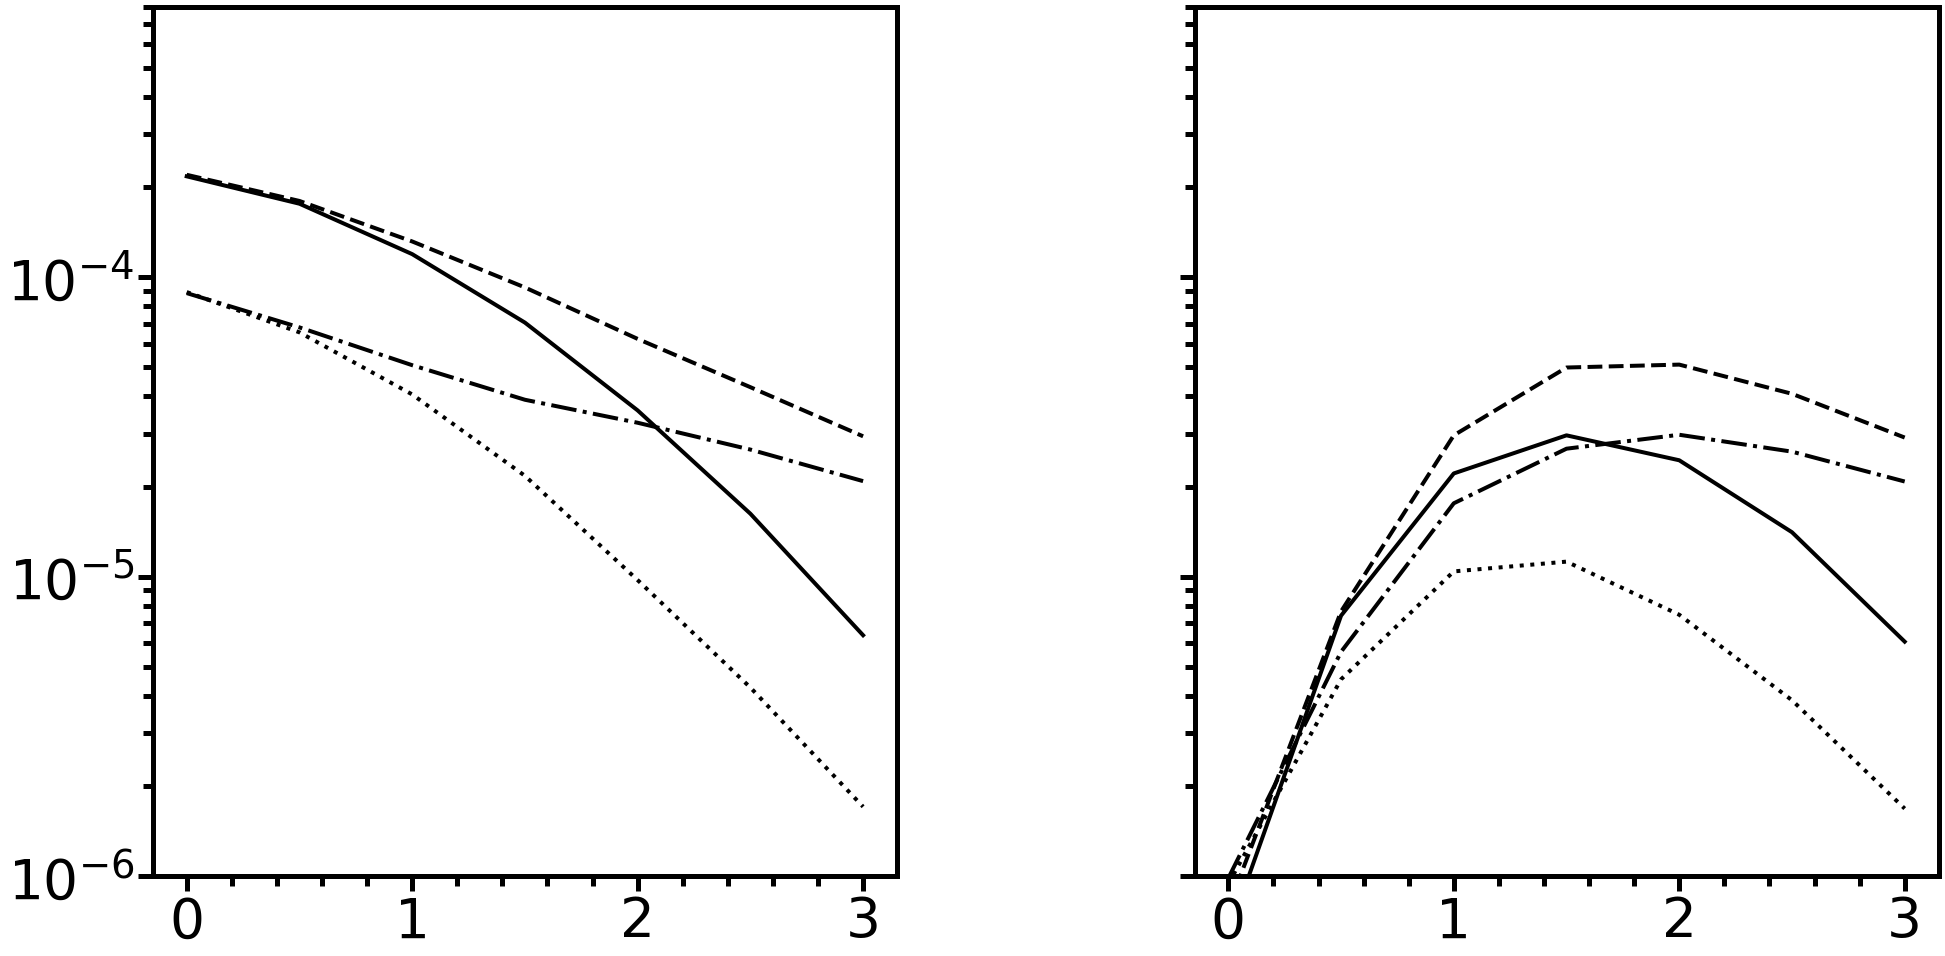

In [187]:
bins=np.arange(-2,2,0.10)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))

linestyles = ['-','--',':','-.']
for ls, (key, model) in zip(linestyles,dictionary_models.items()):
    N = []
    Ncompact = []
    for i,z in enumerate(redshifts):
        galaxies = Galaxies(z=z,dict_SMHM=model)#, quench_dict=quench_dict)
        df = galaxies.catalog
        df = df.query('11.3<Mstar<12.1')
        sizeModel = K13Model(rhalo=df['Rh'], A_K=0.018, sigma_K=0.1 )
        Re = sizeModel.to_galaxy_size()
        if i==0:
            Re0 = np.median(Re)
            print(key,Re0)
        N_, Ncompact_ = sizeModel.get_number_density_and_compacts(Re, z=z,bins=bins,Type='Cassata', stars=None, Re0=Re0)
        N.append(N_)
        Ncompact.append(Ncompact_)
    ax[0].plot(redshifts,N, ls=ls, color='black',lw=4)
    ax[1].plot(redshifts,Ncompact, ls=ls, color='black',lw=4)
ax[0].set_ylim(1e-6,8.e-4)
ax[1].set_ylim(1e-6,8.e-4)
plt.subplots_adjust(wspace=0.4)    

ax[0].set_yscale('log')

# fquench models

## effect of mu on the HOD at fixed model

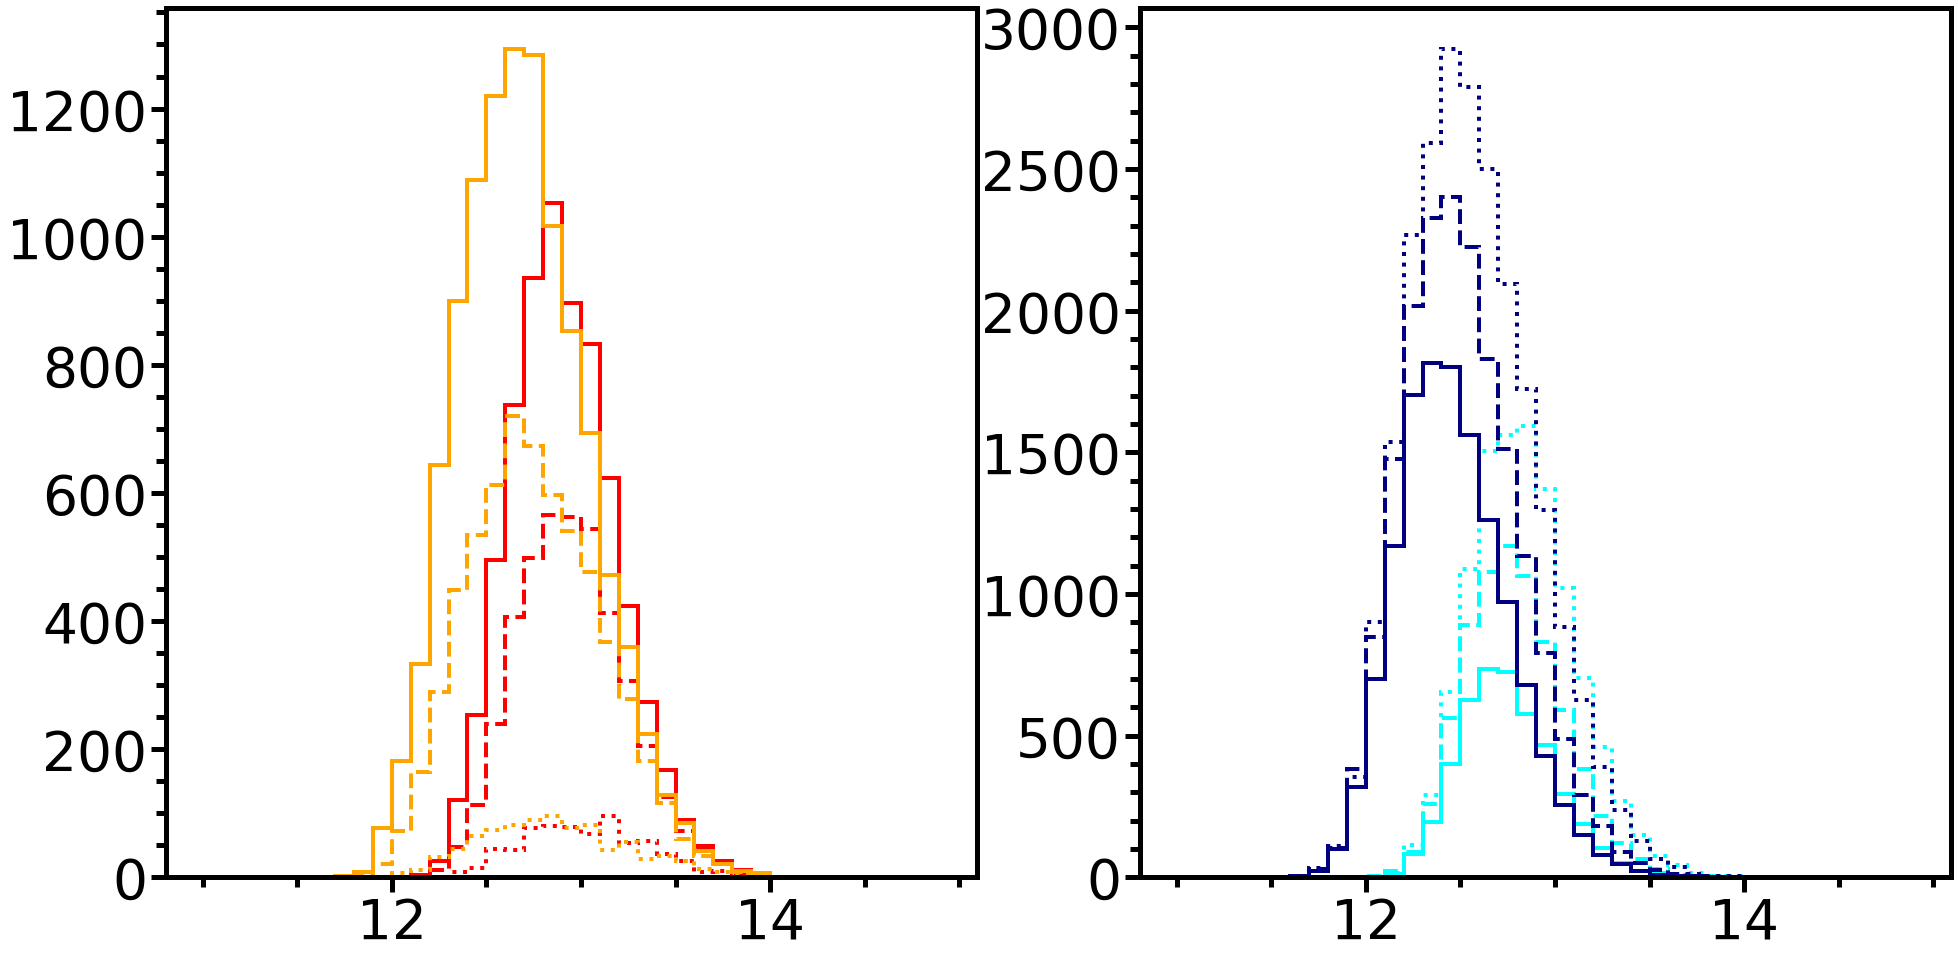

In [14]:
mus = [1,2,4]
z = 2.5
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(32,16))
for mu,ls in zip(mus,['-','--',':']):
    quench_dict = {'M0':1.,'mu':mu}
    galaxies = Galaxies(z=z,dict_SMHM=model_1, quench_dict=quench_dict)
    df = galaxies.catalog
    df = df.query('11.2<Mstar<12.1')
    Q = df.query("TType=='ETGs'")
    SF = df.query("TType=='LTGs'")
    bins = np.arange(11,15,0.1)
    ax1.hist(Q['Mpeak'], bins=bins, density=False, lw=4,ls =ls,histtype='step', color='red')
    ax2.hist(SF['Mpeak'], bins=bins, density=False, lw=4,ls =ls,histtype='step', color='cyan')
    
for mu,ls in zip(mus,['-','--',':']):
    quench_dict = {'M0':1.,'mu':mu}
    galaxies = Galaxies(z=z,dict_SMHM=model_2, quench_dict=quench_dict)
    df = galaxies.catalog
    df = df.query('11.2<Mstar<12.1')
    Q = df.query("TType=='ETGs'")
    SF = df.query("TType=='LTGs'")
    bins = np.arange(11,15,0.1)
    ax1.hist(Q['Mpeak'], bins=bins, density=False, lw=4,ls =ls,histtype='step', color='orange')
    ax2.hist(SF['Mpeak'], bins=bins, density=False, lw=4,ls =ls,histtype='step', color='navy')

## 4x4 plots with (model 1 and 2, mu=3)

In [74]:
n_cmodel_SF

1.7784256559766766e-07

In [30]:

models = [model_3,model_4]
dictionary_models = {'model_3':model_3, 'model_4':model_4}




for mu=1 and model model_3 STARFORMING:  [1.15446779e-04 4.47177194e-04 9.18906501e-04 3.43601896e-03
 7.87001777e-03 1.64925783e-02 3.40621039e-02 5.86983508e-02
 1.01211073e-01 1.57693289e-01 2.25662305e-01 3.02149682e-01
 3.52514256e-01 4.55749129e-01 5.25594150e-01 6.01282051e-01
 6.96649030e-01 7.39514349e-01 7.43243243e-01 8.57142857e-01
 8.48000000e-01]
for mu=1 and model model_3 QUENCHED :  [0.00717761 0.01785861 0.03802077 0.07481837 0.1284039  0.19944386
 0.29045328 0.39098382 0.50111992 0.59375    0.68753875 0.77819884
 0.83761232 0.88551299 0.92513021 0.94772507 0.97095436 0.97297297
 0.99253731 0.98994975 0.98360656]
for mu=2 and model model_3 STARFORMING:  [0.00000000e+00 1.02764361e-04 6.68449198e-04 3.42878325e-03
 7.10900474e-03 1.59238858e-02 3.39675374e-02 5.73309396e-02
 8.87362637e-02 1.34268214e-01 1.82302982e-01 2.43985419e-01
 3.44389337e-01 4.09110629e-01 4.91620112e-01 5.82112567e-01
 6.37408568e-01 7.18750000e-01 8.00865801e-01 8.35777126e-01
 8.85714286e-01]

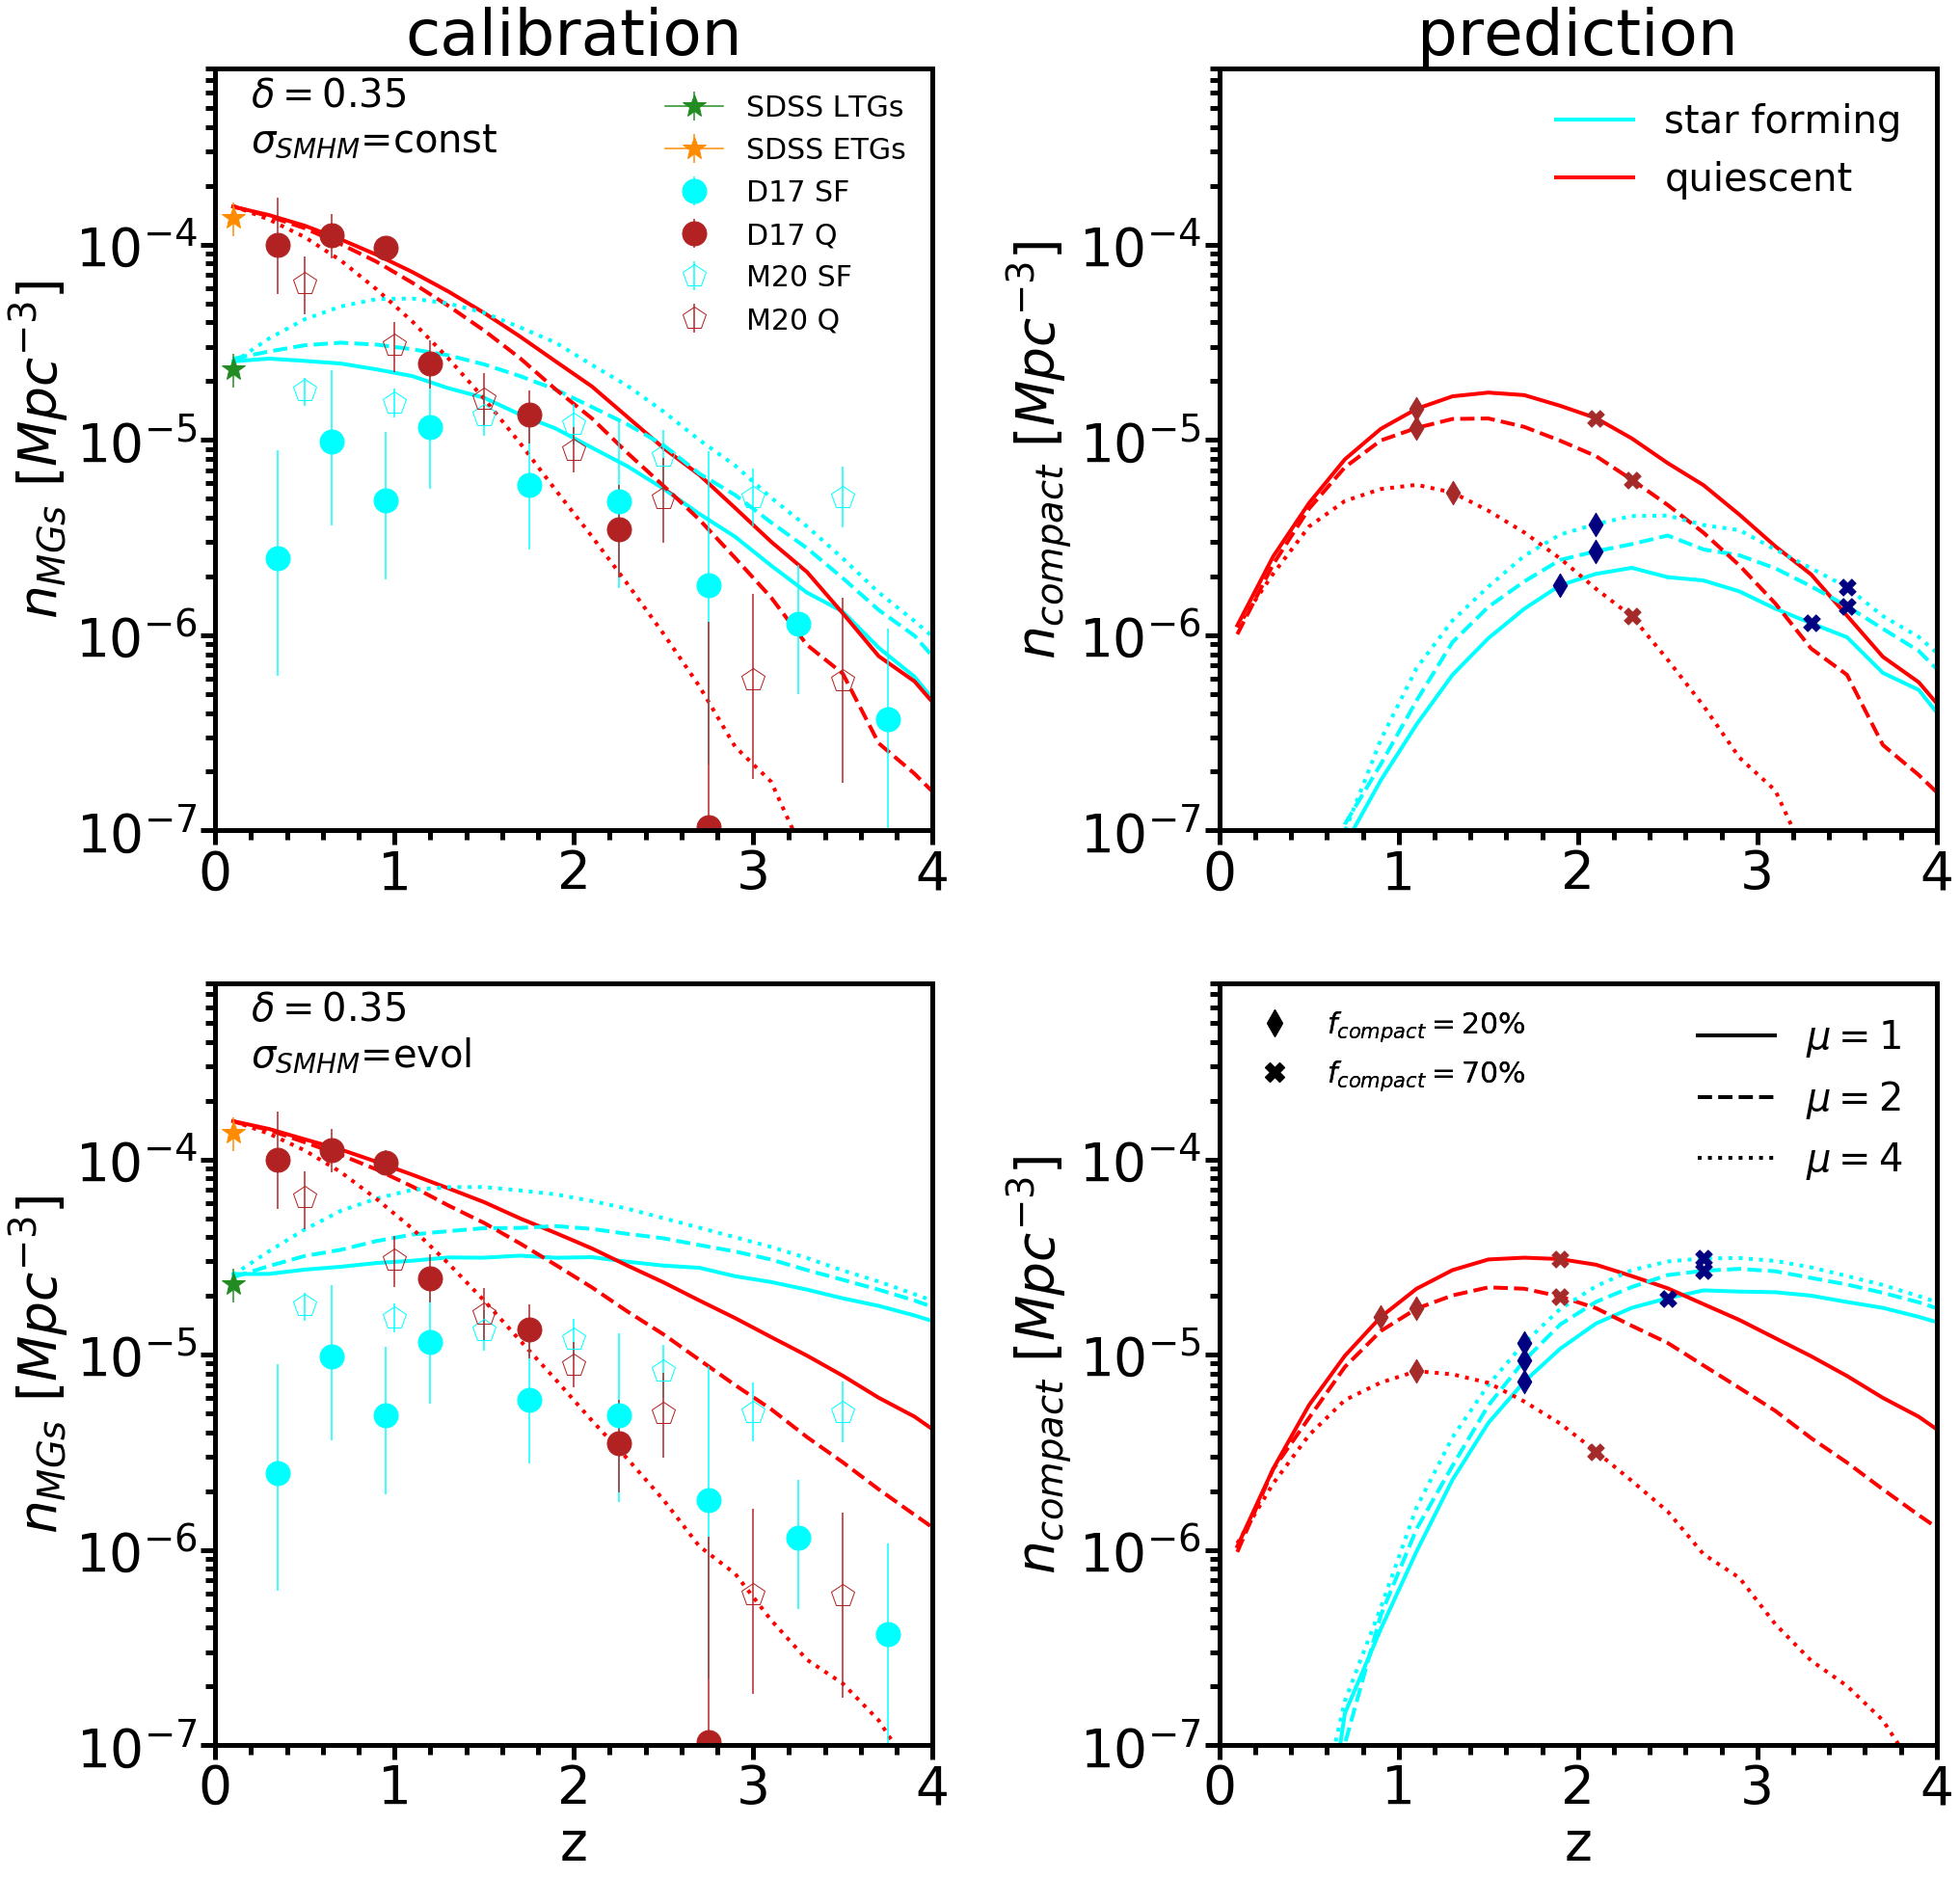

In [31]:
bins=np.arange(-2,2,0.10)
fig, axes = plt.subplots(2,2, sharey=False, figsize=(32,32))

mus = [1,2,4]

x = np.arange(1000,1000)
axes[0][0].text(0.2,3.e-4, r'$\delta=0.35$'+ '\n'+r'$\sigma_{SMHM}$=const', fontsize=40)
axes[1][0].text(0.2,3.e-4, r'$\delta=0.35$'+ '\n'+r'$\sigma_{SMHM}$=evol', fontsize=40)
axes[0][1].plot(x,x, lw=4, ls='-', color='cyan', label='star forming')
axes[0][1].plot(x,x, lw=4, ls='-', color='red', label='quiescent')


linestyles = ['-','--',':','-.']
axes[1][1].plot(x,x, lw=4, ls='-', color='black', label='$\mu=${}'.format(mus[0]))
axes[1][1].plot(x,x, lw=4, ls='--',  color='black', label='$\mu=${}'.format(mus[1]))
axes[1][1].plot(x,x, lw=4, ls=':',  color='black', label='$\mu=${}'.format(mus[2]))
            
redshifts = np.arange(0.1,4.2,0.2)


for ax,(key, model) in zip(axes,dictionary_models.items()):

    for j,(ls,mu) in enumerate(zip(linestyles,mus)):
        countSF = 0
        countQ = 0
        countSF_50 = 0
        countQ_50 = 0
        countSF_20 = 0
        countQ_20 = 0
        quench_dict = {'M0':1.,'mu':mu}
        N_SF = []
        Ncompact_SF = []
        N_Q = []
        Ncompact_Q = []
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            df = df.query('11.2<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.018, sigma_K=0.1 )
            SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.022*1.45, sigma_K=0.1 )
            ReSF = SFsizeModel.to_galaxy_size()
            ReQ = QsizeModel.to_galaxy_size()
            if i==0:
                Re0 = np.median(ReQ)

            N_SF_, Ncompact_SF_ = SFsizeModel.get_number_density_and_compacts(ReSF, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_Q_, Ncompact_Q_ = QsizeModel.get_number_density_and_compacts(ReQ, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_SF.append(N_SF_)
            Ncompact_SF.append(Ncompact_SF_)
            N_Q.append(N_Q_)
            Ncompact_Q.append(Ncompact_Q_)
            if countSF==0:
                if abs(Ncompact_SF_/N_SF_-0.7)<0.05:
                    ax[1].scatter(z,Ncompact_SF_, marker='X', color='navy', s=300,zorder=2)
                    countSF = 1
#            if countSF_50==0:
#                if abs(Ncompact_SF_/N_SF_-0.5)<0.05:
#                    ax[1].scatter(z,Ncompact_SF_, marker='h', color='navy', s=300,zorder=2)
#                    countSF_50 = 1
            if countSF_20==0:
                if abs(Ncompact_SF_/N_SF_-0.2)<0.05:
                    ax[1].scatter(z,Ncompact_SF_, marker='d', color='navy', s=300,zorder=2)
                    countSF_20 = 1
            if countQ==0:
                if abs(Ncompact_Q_/N_Q_-0.7)<0.05:
                    ax[1].scatter(z,Ncompact_Q_, marker='X', color='brown', s=300,zorder=2)
                    countQ = 1
#            if countQ_50==0:
#                if abs(Ncompact_Q_/N_Q_-0.5)<0.05:
#                    ax[1].scatter(z,Ncompact_Q_, marker='h', color='brown', s=300,zorder=2)
#                    countQ_50 = 1
            if countQ_20==0:
                if abs(Ncompact_Q_/N_Q_-0.2)<0.05:
                    ax[1].scatter(z,Ncompact_Q_, marker='d', color='brown', s=300,zorder=2)
                    countQ_20 = 1
            
        if j==0:
        #    ax[0].errorbar([0.1], LTGs_SDSS,err_n_LTGs, color='forestgreen', marker='*', markersize=25, label='SDSS LTGs')
        #    ax[0].errorbar([0.1], ETGs_SDSS,err_n_ETGs, color='darkorange', marker='*', markersize=25, label='SDSS ETGs')#


            #ax[0].errorbar(n_davidzon_SF[:,0], n_davidzon_SF[:,2], yerr=[n_davidzon_SF[:,2]-n_davidzon_SF[:,1],n_davidzon_SF[:,3]-n_davidzon_SF[:,2]], markersize=25, marker='o', color='cyan', label='D17 SF',ls='none')
            #ax[0].errorbar(n_davidzon_Q[:,0], n_davidzon_Q[:,2], yerr=[n_davidzon_Q[:,2]-n_davidzon_Q[:,1],n_davidzon_Q[:,3]-n_davidzon_Q[:,2]], markersize=25, marker='o', color='firebrick', label='D17 Q',ls='none')
          
            #ax[0].errorbar(n_mcleod_SF[:,0], n_mcleod_SF[:,2], yerr=[n_mcleod_SF[:,2]-n_mcleod_SF[:,1],n_mcleod_SF[:,3]-n_mcleod_SF[:,2]], markersize=25, marker='p',fillstyle='none', color='cyan', label='M20 SF',ls='none')
            #ax[0].errorbar(n_mcleod_Q[:,0], n_mcleod_Q[:,2], yerr=[n_mcleod_Q[:,2]-n_mcleod_Q[:,1],n_mcleod_Q[:,3]-n_mcleod_Q[:,2]], markersize=25, marker='p',fillstyle='none', color='firebrick', label='M20 Q',ls='none')

            ax[0].errorbar([0.1], LTGs_SDSS_cmodel,err_n_LTGs_cmodel, color='forestgreen', marker='*', markersize=25, label='SDSS LTGs')
            ax[0].errorbar([0.1], ETGs_SDSS_cmodel,err_n_ETGs_cmodel, color='darkorange', marker='*', markersize=25, label='SDSS ETGs')

            ax[0].errorbar(n_davidzon_SF_112[:,0], n_davidzon_SF_112[:,2], yerr=[n_davidzon_SF_112[:,2]-n_davidzon_SF_112[:,1],n_davidzon_SF_112[:,3]-n_davidzon_SF_112[:,2]], markersize=25, marker='o', color='cyan', label='D17 SF',ls='none')
            ax[0].errorbar(n_davidzon_Q_112[:,0], n_davidzon_Q_112[:,2], yerr=[n_davidzon_Q_112[:,2]-n_davidzon_Q_112[:,1],n_davidzon_Q_112[:,3]-n_davidzon_Q_112[:,2]], markersize=25, marker='o', color='firebrick', label='D17 Q',ls='none')

            ax[0].errorbar(n_mcleod_SF_112[:,0], n_mcleod_SF_112[:,2], yerr=[n_mcleod_SF_112[:,2]-n_mcleod_SF_112[:,1],n_mcleod_SF_112[:,3]-n_mcleod_SF_112[:,2]], markersize=25, marker='p',fillstyle='none', color='cyan', label='M20 SF',ls='none')
            ax[0].errorbar(n_mcleod_Q_112[:,0], n_mcleod_Q_112[:,2], yerr=[n_mcleod_Q_112[:,2]-n_mcleod_Q_112[:,1],n_mcleod_Q_112[:,3]-n_mcleod_Q_112[:,2]], markersize=25, marker='p',fillstyle='none', color='firebrick', label='M20 Q',ls='none')

            
        
        print(f'for mu={mu} and model {key} STARFORMING: ',np.array(Ncompact_SF)/np.array(N_SF) )
        print(f'for mu={mu} and model {key} QUENCHED : ',np.array(Ncompact_Q)/np.array(N_Q) )
        ax[0].plot(redshifts,N_SF, ls=ls, color='cyan',lw=4, zorder=1)
        ax[1].plot(redshifts,Ncompact_SF, ls=ls, color='cyan',lw=4, zorder=1)
        ax[0].plot(redshifts,N_Q, ls=ls, color='red',lw=4, zorder=1)
        ax[1].plot(redshifts,Ncompact_Q, ls=ls, color='red',lw=4, zorder=1)
        ax[0].set_ylim(1e-7,8.e-4)
        ax[1].set_ylim(1e-7,8.e-4)
        ax[0].set_xlim(0,4)
        ax[1].set_xlim(0,4)
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')
        ax[1].set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
        ax[0].set_ylabel('$n_{MGs} \ [Mpc^{-3}]$')
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)



axes[0][0].set_title('calibration')
axes[0][1].set_title('prediction')
axes[0][0].legend(fontsize=30, frameon=False, loc='upper right')
#axes[1][0].legend(fontsize=30, frameon=False)
axes[0][1].legend(fontsize=40, frameon=False)
leg = axes[1][1].legend(fontsize=40, frameon=False)

diam = Line2D([], [], color='black', marker='d', linestyle='None',
                          markersize=20, label='$f_{compact}=$20%')
pentagon = Line2D([], [], color='black', marker='h', linestyle='None',
                          markersize=20, label='$f_{compact}=$50%')
ex = Line2D([], [], color='black', marker='X', linestyle='None',
                          markersize=20, label='$f_{compact}=$70%')
lines = [diam,ex]
labels = ['$f_{compact}=$20%','$f_{compact}=$70%']

leg2 = axes[1][1].legend(lines, labels, loc='upper left',  fontsize=30, frameon=False)    
axes[1][1].add_artist(leg) 
axes[1][1].add_artist(leg2) 

axes[1][0].set_xlabel('z')
axes[1][1].set_xlabel('z')
plt.subplots_adjust(wspace=0.4)    
plt.savefig('model3_fquench.pdf',bbox_inches='tight')


In [33]:
3.e-5/2.e-4

0.15

In [26]:

def scatterevol(stars,z, norm):
    scattz = norm*np.sqrt(z)
    scatt = np.sqrt( 0.15**2 + scattz**2)
    return np.random.normal(stars,scatt)
    
var_gamma_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0.07,M11=0,SHMnorm11=0)
models = [model_1, var_gamma_1]
dictionary_models = {'model_1':model_1, 'var gamma':var_gamma_1}

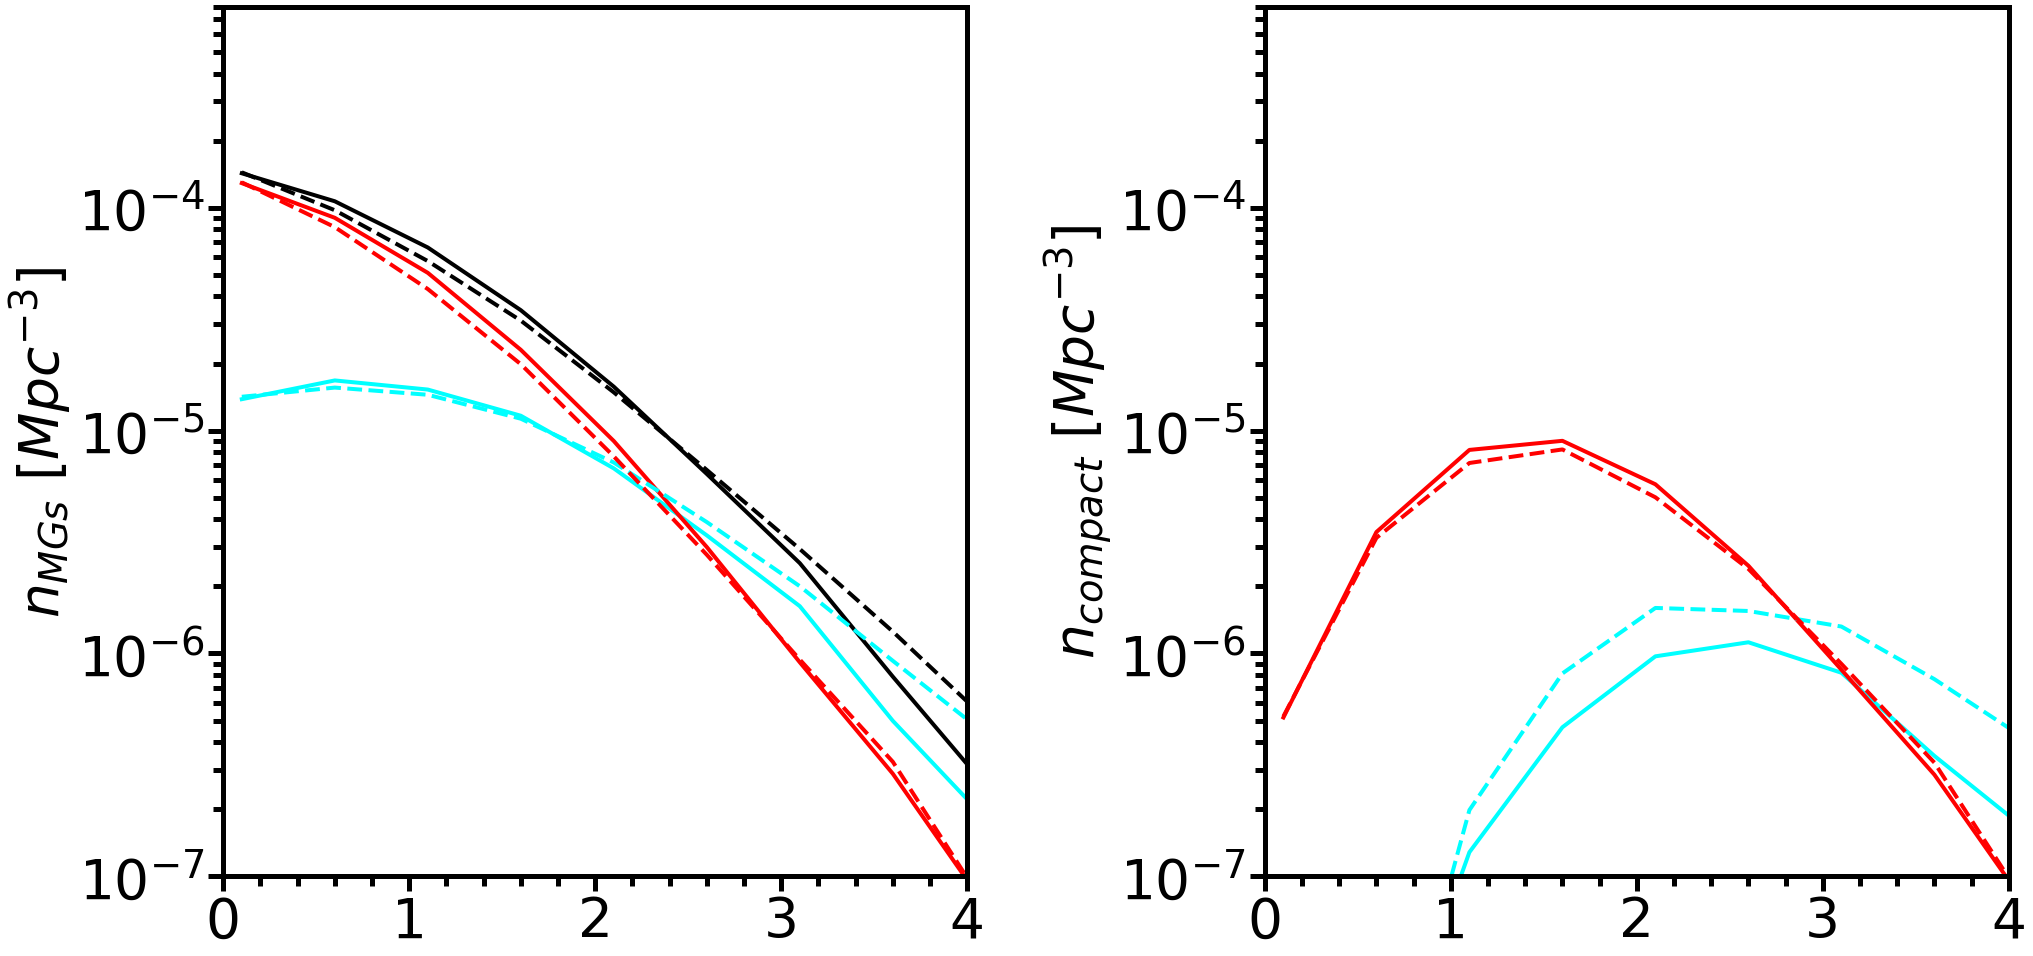

In [29]:
bins=np.arange(-2,2,0.10)


linestyles = ['-','--',':','-.']

            
redshifts = np.arange(0.1,4.6,0.5)
mus=[2]


fig, ax = plt.subplots(1,2, figsize=(32,16))
for ls,(key, model) in zip(linestyles,dictionary_models.items()):
    for j,mu in enumerate(mus):
        quench_dict = {'M0':1.,'mu':mu}
        N_SF = []
        Ncompact_SF = []
        N_Q = []
        Ncompact_Q = []
        N_all =[]
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            if key=='model_1':
                norm=0
            else:
                norm=0.07
            df.loc[:,'Mstar'] = scatterevol(df.loc[:,'Mstar'],z, norm)-0.1 #norm=0 for constant models
            df = df.query('11.3<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.018, sigma_K=0.1 )
            SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.022*1.45, sigma_K=0.1 )
            AllsizeModel = K13Model(rhalo=df['Rh'], A_K=0.022*1.45, sigma_K=0.1 )
            ReSF = SFsizeModel.to_galaxy_size()
            ReQ = QsizeModel.to_galaxy_size()
            ReAll = AllsizeModel.to_galaxy_size()
            
            if i==0:
                Re0 = np.median(ReQ)

            N_SF_, Ncompact_SF_ = SFsizeModel.get_number_density_and_compacts(ReSF, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_Q_, Ncompact_Q_ = QsizeModel.get_number_density_and_compacts(ReQ, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_all_,_ = AllsizeModel.get_number_density_and_compacts(ReAll, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_SF.append(N_SF_)
            Ncompact_SF.append(Ncompact_SF_)
            N_Q.append(N_Q_)
            Ncompact_Q.append(Ncompact_Q_)
            N_all.append(N_all_)

        ax[0].plot(redshifts,N_SF, ls=ls, color='cyan',lw=4)
        ax[0].plot(redshifts,N_all, ls=ls, color='black',lw=4)
        ax[1].plot(redshifts,Ncompact_SF, ls=ls, color='cyan',lw=4)
        ax[0].plot(redshifts,N_Q, ls=ls, color='red',lw=4)
        ax[1].plot(redshifts,Ncompact_Q, ls=ls, color='red',lw=4)
        ax[0].set_ylim(1e-7,8.e-4)
        ax[1].set_ylim(1e-7,8.e-4)
        ax[0].set_xlim(0,4)
        ax[1].set_xlim(0,4)
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')
        ax[1].set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
        ax[0].set_ylabel('$n_{MGs} \ [Mpc^{-3}]$')
   # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
   # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)


plt.subplots_adjust(wspace=0.4)    

In [32]:
np.sqrt((0.07*np.sqrt(3))**2+0.15**2)

0.19287301521985908

In [6]:
model_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
var_gamma_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0.1,M11=0,SHMnorm11=0) 
var_gamma_2 = dict(gamma10=0.5, scatterevol=False, gamma11=0.2,M11=0,SHMnorm11=0) 
var_gamma_3 = dict(gamma10=0.5, scatterevol=False, gamma11=0.3,M11=0,SHMnorm11=0) 

models = [model_1,var_gamma_1, var_gamma_2, var_gamma_3]

dictionary_models = {'model 4':model_4, 'gamma=0.05':var_gamma_1, 'gamma=0.2':var_gamma_2, 'gamma=0.3':var_gamma_3}

2.7982507288629737e-05
9.352769679300295e-06


No handles with labels found to put in legend.


1.583381924198251e-05


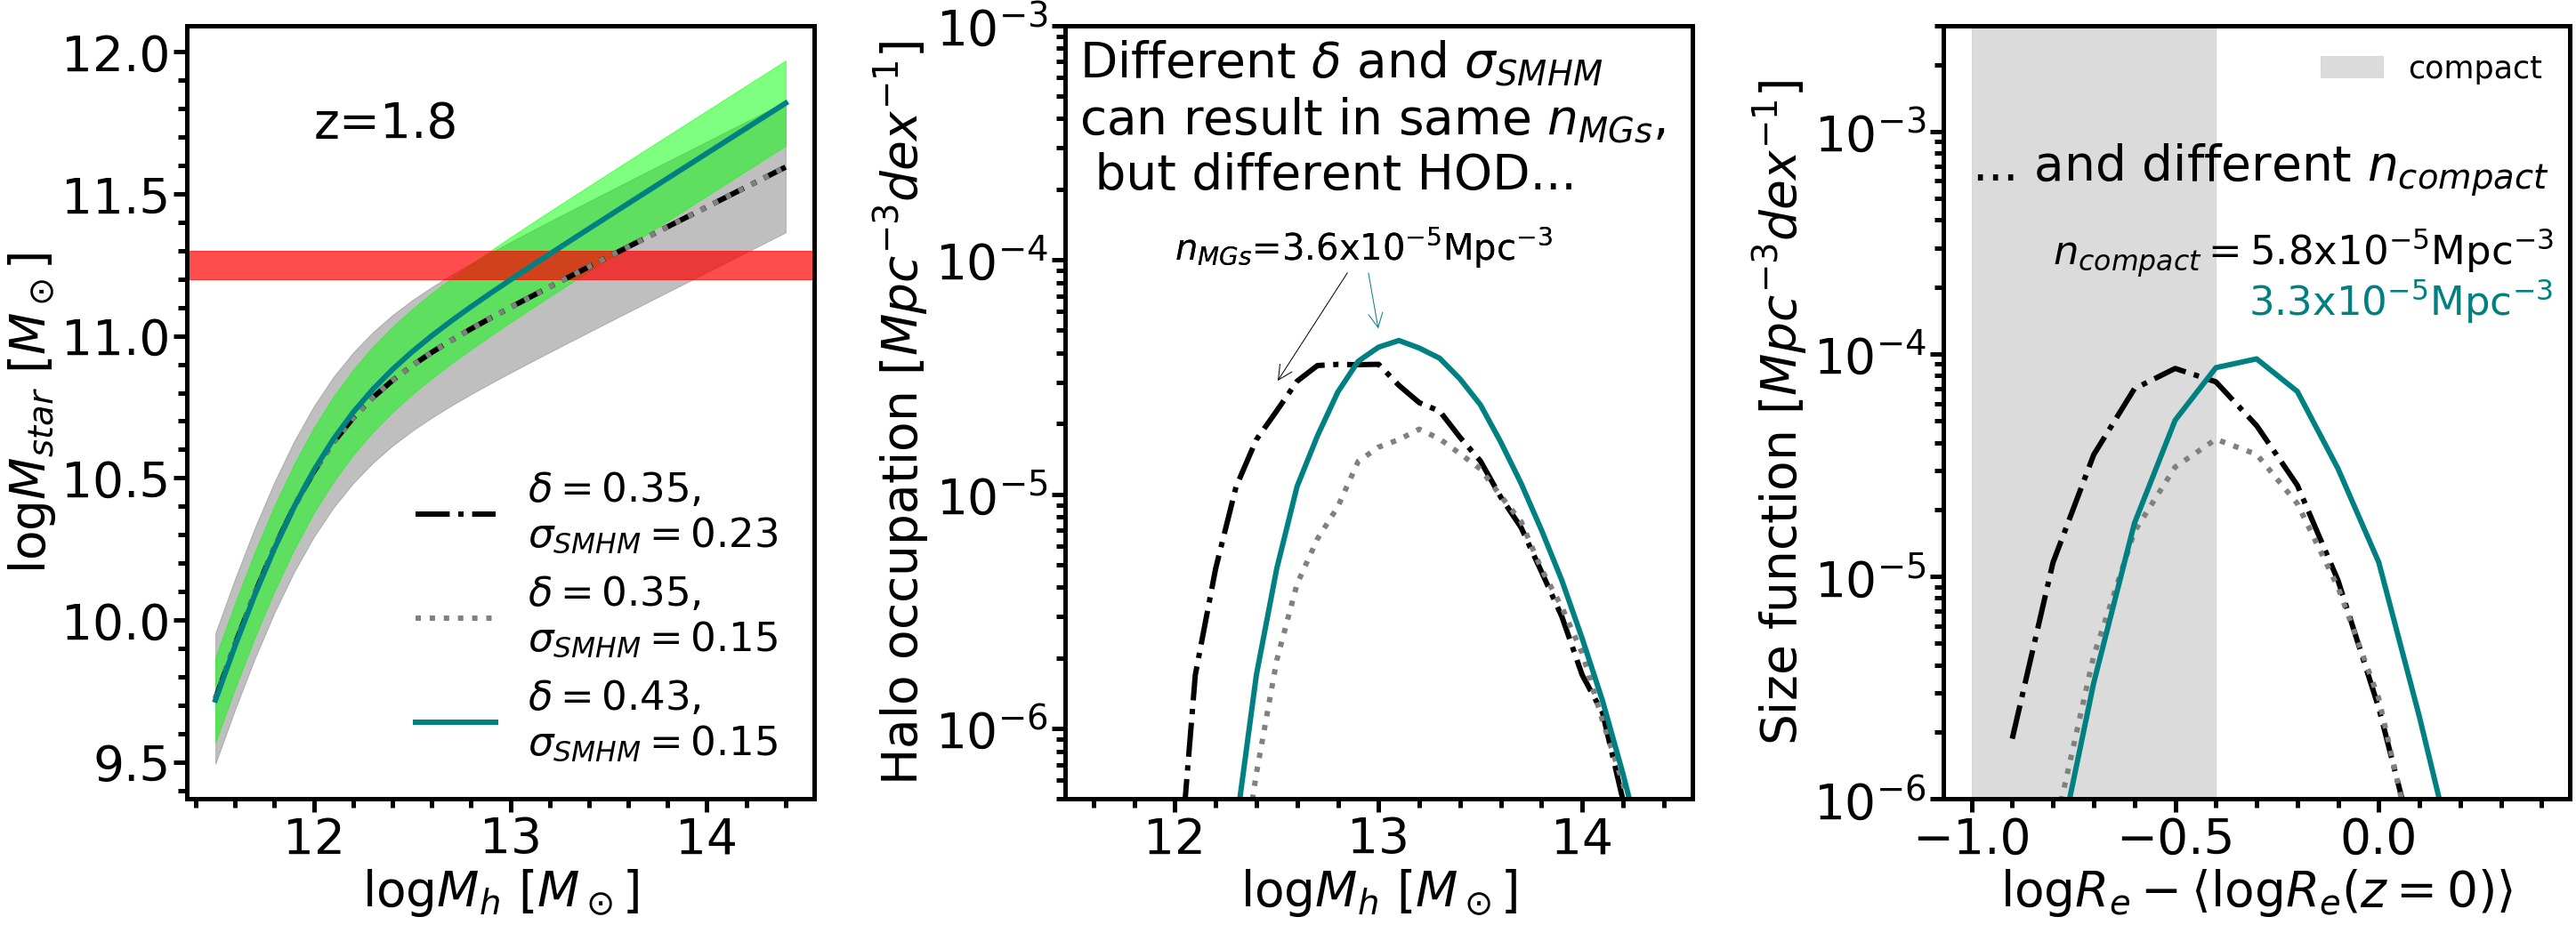

In [7]:
z = 1.7
Vol = Volume().Vol
bins_star = np.arange(11.3,12.2,0.05)
bins_halo = np.arange(11.5,14.5,0.1)
binsRe = np.arange(-1.,0.5,0.1)
dictionary_models = {'$\delta=0.35,$'+'\n'+'$\sigma_{SMHM}=0.23$':model_4, 
                     '$\delta=0.35,$'+'\n'+'$\sigma_{SMHM}=0.15$':model_3, 
                     '$\delta=0.43,$'+'\n'+'$\sigma_{SMHM}=0.15$':var_gamma_1}
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(48,16))


ax1.axhspan(11.2, 11.3, alpha=0.7, color='red')
colors =['black','gray','teal']
for col,((key, model),ls) in zip(colors, zip(dictionary_models.items(), ['-.',':','-'])):
    SMHM = grylls19(**model)
    stars = SMHM(bins_halo, z=1.7,scatter=0)
    ax1.plot(bins_halo,stars, color=col, lw=6, ls=ls, label=key)
    if col=='black':
        s = 0.23
        c = 'gray'
        ax1.fill_between(bins_halo,stars-s,stars+s, color=c, alpha=0.5)
    elif col=='teal':
        s = 0.15
        c = 'lime'
        ax1.fill_between(bins_halo,stars-s,stars+s, color=c, alpha=0.5)
    else:
        s =0.15
        col='gray'
    
    
    
    galaxies = Galaxies(z=z,dict_SMHM=model)
    df = galaxies.catalog
    df = df.query('11.3<Mstar<12.1')
    h = np.histogram(df['Mstar'], bins=bins_star)[0]/Vol/0.05
    integral = np.sum(h)*0.05
    
    
    h = np.histogram(df['Mpeak'], bins=bins_halo)[0]/Vol/0.1
    ax2.plot(bins_halo[1:],h, color=col, ls=ls, lw=6)
    ax2.set_yscale('log')
    ax2.set_xlabel('$\log{M_{h}} \ [M_\odot]$')
    ax2.set_ylabel('Halo occupation $[Mpc^{-3} dex^{-1}]$')#' $\phi(M_h|M_{star}>10^{11.2} M_\odot) \ [Mpc^{-3} dex^{-1}]$')
    
    if col=='black' or col=='gray':
        A_K = 0.015
    else:
        A_K=0.018
    
    galaxies_0 = Galaxies(z=0.1,dict_SMHM=model)
    df_0 = galaxies_0.catalog
    df_0 = df_0.query('11.3<Mstar<12.1')    
    sizeModel_0 = K13Model(rhalo=df_0['Rh'], A_K=A_K, sigma_K=0.1 )
    Re0 = np.mean(sizeModel_0.to_galaxy_size())
    sizeModel = K13Model(rhalo=df['Rh'], A_K=A_K, sigma_K=0.1 )
    
    Re = sizeModel.to_galaxy_size()
    _,N_compact = sizeModel.get_number_density_and_compacts(Re, bins=np.arange(-2,2,0.10),Type='Cassata', stars=None, Re0=Re0)
    print(N_compact)
    
    Re = Re-Re0
    h = np.histogram(Re, bins=binsRe)[0]/Vol/0.1
    ax3.plot(binsRe[1:],h, color=col, ls=ls, lw=6)
    ax3.set_ylabel('Size function $[Mpc^{-3} dex^{-1}]$')#'$\phi(R_e|M_{star}>10^{11.2} M_\odot) \ [Mpc^{-3} dex^{-1}]$')
    
ax1.legend(frameon=False, fontsize=45)
#ax1.set_title('SMHM relation')
ax1.text(12,11.7, 'z=1.8')
ax1.set_ylabel('$\log{M_{star}} \ [M_\odot]$')
ax1.set_xlabel('$\log{M_{h}} \ [M_\odot]$')
ax2.legend(frameon=False, fontsize=40, loc='upper left')
ax2.set_ylim(5.e-7,1.e-3)
ax2.text(11.53, 2.e-4, 'Different $\delta$ and $\sigma_{SMHM}$\ncan result in same $n_{MGs}$,\n but different HOD...')#, \n $n_{MGs}$=3.6x10$^{-5}$Mpc$^{-3}$', fontsize=45)  
#ax2.set_title('Different halo occupation')
#ax1.text(11.8,8.e-5,'z=1.8', fontsize=45)    
#ax3.set_title('Implied size function')
ax3.axvspan(-1,-0.4,color='lightgray', alpha=0.8, label='compact')
ax3.text(-0.8,2.5e-4, '$n_{compact}=$5.8x10$^{-5}$Mpc$^{-3}$',color='black', fontsize=45)
ax3.text(-0.32,1.5e-4, '3.3x10$^{-5}$Mpc$^{-3}$',color='teal', fontsize=45)
ax3.legend(frameon=False, fontsize=35, loc='upper right')
ax3.set_yscale('log')
ax3.set_xlabel(r'$\log{R_e} - \langle\log{R_e(z=0)}\rangle$')
ax3.set_ylim(1.e-6, 3.e-3)
ax3.text(-1,6.e-4,"... and different $n_{compact}$")
plt.subplots_adjust(wspace=0.4)
ax2.annotate("$n_{MGs}$=3.6x10$^{-5}$Mpc$^{-3}$", xy=(12.5,3.e-5), xytext=(12.,1.e-4), arrowprops=dict(arrowstyle="->", color='black'), fontsize=40)
ax2.annotate("$n_{MGs}$=3.6x10$^{-5}$Mpc$^{-3}$", xy=(13,5.e-5), xytext=(12.,1.e-4), arrowprops=dict(arrowstyle="->", color='teal'), fontsize=40)
plt.savefig('cartoon_hod_introduction.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,2)
for key, model in dictionary_models.items():
    for j,(ls,mu) in enumerate(zip(linestyles,mus)):
        quench_dict = {'M0':1.,'mu':2}
        N_SF = []
        Ncompact_SF = []
        N_Q = []
        Ncompact_Q = []
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            df = df.query('11.2<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.018, sigma_K=0.1 )
            SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.022*1.45, sigma_K=0.1 )
            ReSF = SFsizeModel.to_galaxy_size()
            ReQ = QsizeModel.to_galaxy_size()
            if i==0:
                Re0 = np.median(ReQ)

            N_SF_, Ncompact_SF_ = SFsizeModel.get_number_density_and_compacts(ReSF, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_Q_, Ncompact_Q_ = QsizeModel.get_number_density_and_compacts(ReQ, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            N_SF.append(N_SF_)
            Ncompact_SF.append(Ncompact_SF_)
            N_Q.append(N_Q_)
            Ncompact_Q.append(Ncompact_Q_)

        if j==0:
            ax[0].errorbar([0.1], LTGs_SDSS,err_n_LTGs, color='forestgreen', marker='*', markersize=25, label='SDSS LTGs')
            ax[0].errorbar([0.1], ETGs_SDSS,err_n_ETGs, color='darkorange', marker='*', markersize=25, label='SDSS ETGs')


            ax[0].errorbar(n_davidzon_SF[:,0], n_davidzon_SF[:,2], yerr=[n_davidzon_SF[:,2]-n_davidzon_SF[:,1],n_davidzon_SF[:,3]-n_davidzon_SF[:,2]], markersize=25, marker='o', color='cyan', label='D17 SF',ls='none')
            ax[0].errorbar(n_davidzon_Q[:,0], n_davidzon_Q[:,2], yerr=[n_davidzon_Q[:,2]-n_davidzon_Q[:,1],n_davidzon_Q[:,3]-n_davidzon_Q[:,2]], markersize=25, marker='o', color='firebrick', label='D17 Q',ls='none')
          
            ax[0].errorbar(n_mcleod_SF[:,0], n_mcleod_SF[:,2], yerr=[n_mcleod_SF[:,2]-n_mcleod_SF[:,1],n_mcleod_SF[:,3]-n_mcleod_SF[:,2]], markersize=25, marker='p',fillstyle='none', color='cyan', label='M20 SF',ls='none')
            ax[0].errorbar(n_mcleod_Q[:,0], n_mcleod_Q[:,2], yerr=[n_mcleod_Q[:,2]-n_mcleod_Q[:,1],n_mcleod_Q[:,3]-n_mcleod_Q[:,2]], markersize=25, marker='p',fillstyle='none', color='firebrick', label='M20 Q',ls='none')

           # ax[0].errorbar([0.1], LTGs_SDSS_cmodel,err_n_LTGs_cmodel, color='forestgreen', marker='*', markersize=25, label='SDSS LTGs')
           # ax[0].errorbar([0.1], ETGs_SDSS_cmodel,err_n_ETGs_cmodel, color='darkorange', marker='*', markersize=25, label='SDSS ETGs')

            #ax[0].errorbar(n_davidzon_SF_112[:,0], n_davidzon_SF_112[:,2], yerr=[n_davidzon_SF_112[:,2]-n_davidzon_SF_112[:,1],n_davidzon_SF_112[:,3]-n_davidzon_SF_112[:,2]], markersize=25, marker='o', color='cyan', label='D17 SF',ls='none')
            #ax[0].errorbar(n_davidzon_Q_112[:,0], n_davidzon_Q_112[:,2], yerr=[n_davidzon_Q_112[:,2]-n_davidzon_Q_112[:,1],n_davidzon_Q_112[:,3]-n_davidzon_Q_112[:,2]], markersize=25, marker='o', color='firebrick', label='D17 Q',ls='none')

            #ax[0].errorbar(n_mcleod_SF_112[:,0], n_mcleod_SF_112[:,2], yerr=[n_mcleod_SF_112[:,2]-n_mcleod_SF_112[:,1],n_mcleod_SF_112[:,3]-n_mcleod_SF_112[:,2]], markersize=25, marker='p',fillstyle='none', color='cyan', label='M20 SF',ls='none')
            #ax[0].errorbar(n_mcleod_Q_112[:,0], n_mcleod_Q_112[:,2], yerr=[n_mcleod_Q_112[:,2]-n_mcleod_Q_112[:,1],n_mcleod_Q_112[:,3]-n_mcleod_Q_112[:,2]], markersize=25, marker='p',fillstyle='none', color='firebrick', label='M20 Q',ls='none')

            
        ax[0].plot(redshifts,N_SF, ls=ls, color='cyan',lw=4)
        ax[1].plot(redshifts,Ncompact_SF, ls=ls, color='cyan',lw=4)
        ax[0].plot(redshifts,N_Q, ls=ls, color='red',lw=4)
        ax[1].plot(redshifts,Ncompact_Q, ls=ls, color='red',lw=4)
        ax[0].set_ylim(1e-7,8.e-4)
        ax[1].set_ylim(1e-7,8.e-4)
        ax[0].set_xlim(0,4)
        ax[1].set_xlim(0,4)
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')
        ax[1].set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
        ax[0].set_ylabel('$n_{MGs} \ [Mpc^{-3}]$')
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)

#axes[0][0].set_title('calibration')
#a#xes[0][1].set_title('prediction')
#ax#es[0][0].legend(fontsize=30, frameon=False, loc='upper right')
#axes[1][0].legend(fontsize=30, frameon=False)
#ax#es[0][1].legend(fontsize=40, frameon=False)
#axes[1][1].legend(fontsize=40, frameon=False)
#axes[1][0].set_xlabel('z')
#axes[1][1].set_xlabel('z')
#plt.subplots_adjust(wspace=0.4)    

# using Moster SMHM

In [43]:
redshifts = [0.1,0.5,1,2,4]
dicts_SF = [ dict(M10=11.75,M11=0,SHMnorm10=0.12, SHMnorm11=0,beta10=1.75,beta11=0, gamma10=0.57,gamma11=0, Msigma=10.35,sigma0=0.2, alpha=1.1 ),
      dict(M10=11.8,M11=0,SHMnorm10=0.14, SHMnorm11=0,beta10=1.7,beta11=0, gamma10=0.58,gamma11=0 , Msigma=10.25,sigma0=0.1, alpha=0.5),
      dict(M10=11.9,M11=0,SHMnorm10=0.15, SHMnorm11=0,beta10=1.6,beta11=0, gamma10=0.6,gamma11=0 , Msigma=10.15,sigma0=0.08, alpha=0.45),
      dict(M10=11.95,M11=0,SHMnorm10=0.16, SHMnorm11=0,beta10=1.55,beta11=0, gamma10=0.62,gamma11=0 , Msigma=10.10,sigma0=0.10, alpha=0.35 ),
      dict(M10=12.10,M11=0,SHMnorm10=0.18, SHMnorm11=0,beta10=1.5,beta11=0, gamma10=0.64,gamma11=0 , Msigma=9.95,sigma0=0.03, alpha=0.3 ),
     ]

dicts_Q = [ dict(M10=11.65,M11=0,SHMnorm10=0.17, SHMnorm11=0,beta10=1.8,beta11=0, gamma10=0.57,gamma11=0,Msigma=10.0,sigma0=0.14, alpha=0.55),
      dict(M10=11.75,M11=0,SHMnorm10=0.19, SHMnorm11=0,beta10=1.75,beta11=0, gamma10=0.58,gamma11=0 ,Msigma=9.9,sigma0=0.12, alpha=0.45 ),
      dict(M10=11.85,M11=0,SHMnorm10=0.21, SHMnorm11=0,beta10=1.65,beta11=0, gamma10=0.6,gamma11=0 ,Msigma=9.8,sigma0=0.08, alpha=0.4 ),
      dict(M10=11.9,M11=0,SHMnorm10=0.21, SHMnorm11=0,beta10=1.6,beta11=0, gamma10=0.62,gamma11=0 ,Msigma=9.7,sigma0=0.07, alpha=0.35),
      dict(M10=12.0,M11=0,SHMnorm10=0.21, SHMnorm11=0,beta10=1.55,beta11=0, gamma10=0.64,gamma11=0 ,Msigma=9.6,sigma0=0.06, alpha=0.3  ),
     ]

dicts_all = [ dict(M10=11.8,M11=0,SHMnorm10=0.14, SHMnorm11=0,beta10=1.75,beta11=0, gamma10=0.57,gamma11=0,Msigma=10.8,sigma0=0.16, alpha=1),
      dict(M10=11.85,M11=0,SHMnorm10=0.16, SHMnorm11=0,beta10=1.7,beta11=0, gamma10=0.58,gamma11=0 ,Msigma=10.7,sigma0=0.14, alpha=0.9 ),
      dict(M10=11.95,M11=0,SHMnorm10=0.18, SHMnorm11=0,beta10=1.6,beta11=0, gamma10=0.6,gamma11=0 ,Msigma=10.6,sigma0=0.12, alpha=0.75 ),
      dict(M10=12,M11=0,SHMnorm10=0.18, SHMnorm11=0,beta10=1.55,beta11=0, gamma10=0.62,gamma11=0 ,Msigma=10.5,sigma0=0.1, alpha=0.5),
      dict(M10=12.10,M11=0,SHMnorm10=0.19, SHMnorm11=0,beta10=1.5,beta11=0, gamma10=0.64,gamma11=0 ,Msigma=10.4,sigma0=0.08, alpha=0.4  ),
     ]





/home/lz1f17/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/lz1f17/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


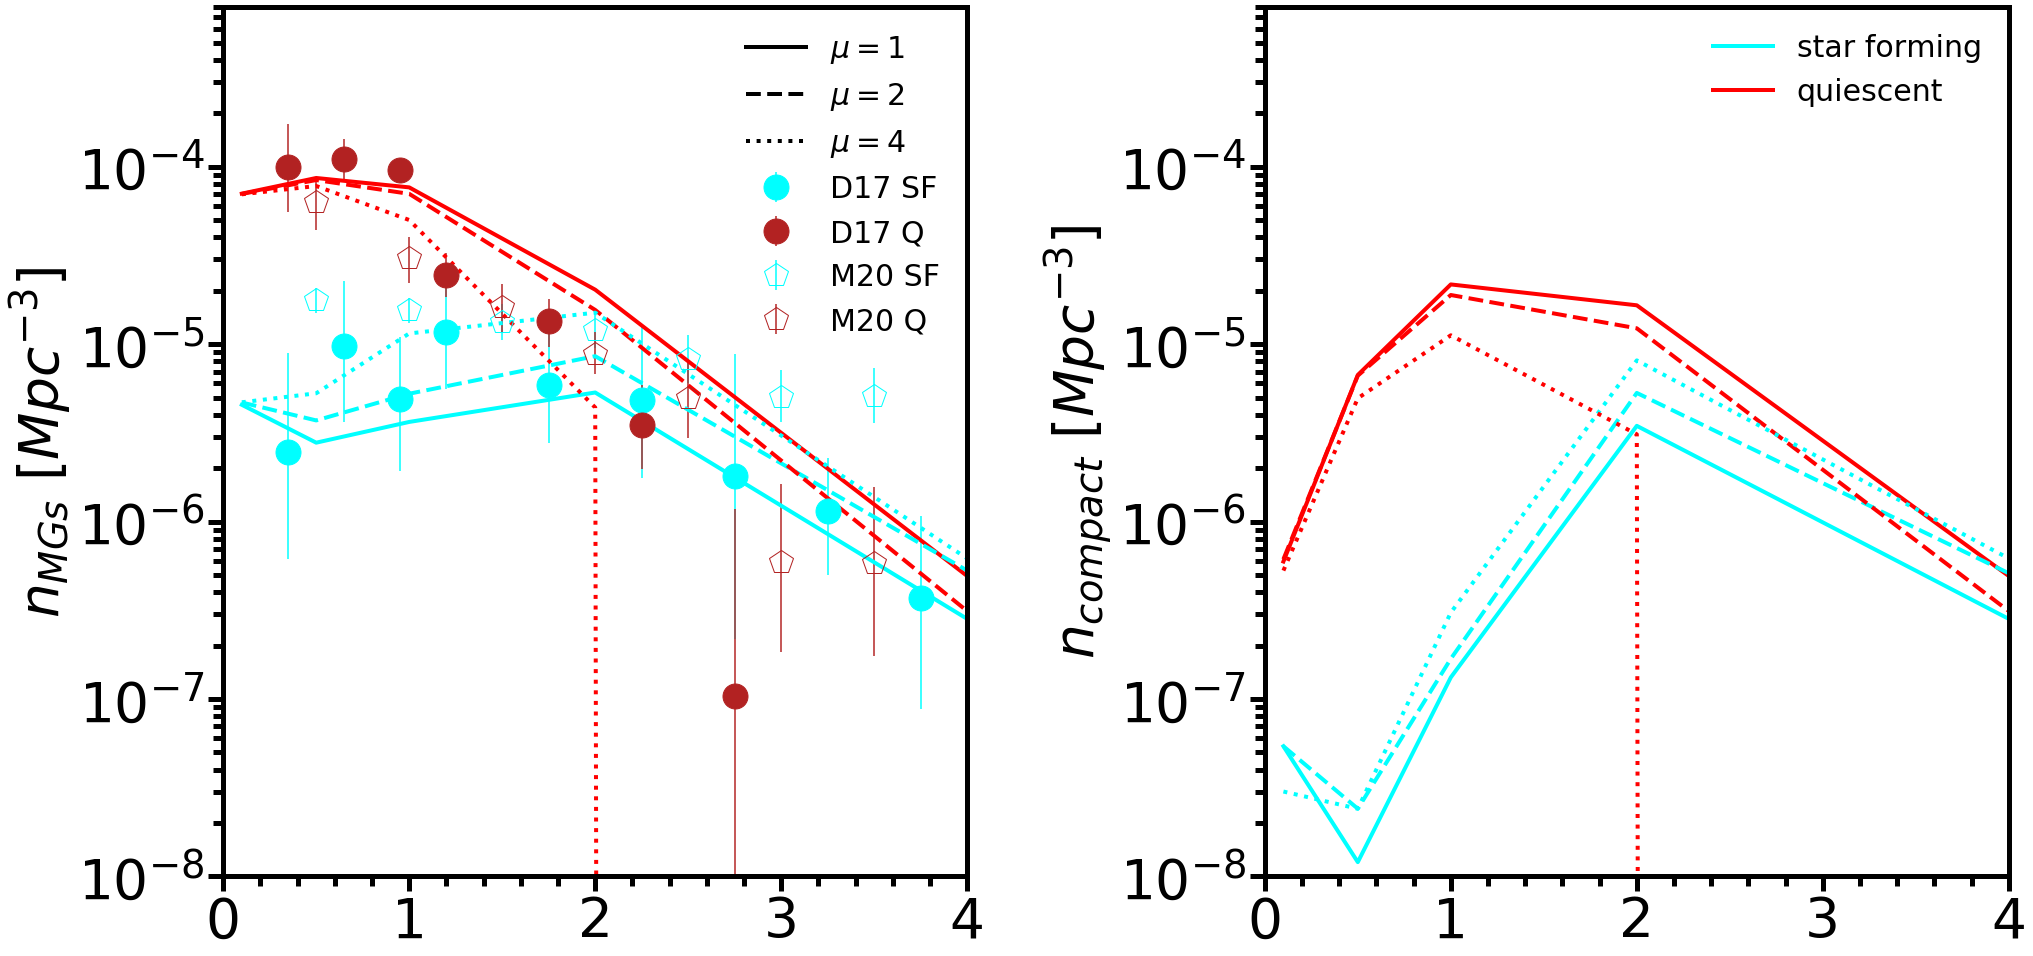

In [45]:
bins=np.arange(-2,2,0.10)
fig, ax = plt.subplots(1,2, sharey=False, figsize=(32,16))
mus = [1,2,4]

x = np.arange(1000,1000)
#axes[0][0].text(0.2,3.e-4, r'$\delta=0.35$'+ '\n'+r'$\sigma_{SMHM}$=const', fontsize=40)
#axes[1][0].text(0.2,3.e-4, r'$\delta=0.35$'+ '\n'+r'$\sigma_{SMHM}$=evol', fontsize=40)
ax[1].plot(x,x, lw=4, ls='-', color='cyan', label='star forming')
ax[1].plot(x,x, lw=4, ls='-', color='red', label='quiescent')


linestyles = ['-','--',':','-.']
ax[0].plot(x,x, lw=4, ls='-', color='black', label='$\mu=${}'.format(mus[0]))
ax[0].plot(x,x, lw=4, ls='--',  color='black', label='$\mu=${}'.format(mus[1]))
ax[0].plot(x,x, lw=4, ls=':',  color='black', label='$\mu=${}'.format(mus[2]))
            



for j,(ls,mu) in enumerate(zip(linestyles,mus)):
    quench_dict = {'M0':1,'mu':mu}
    N_SF = []
    Ncompact_SF = []
    N_Q = []
    Ncompact_Q = []
    meansize_Q = []
    meansize_SF =[]
    for i,z in enumerate(redshifts):
        SFgalaxies = Galaxies(z=z,dict_SMHM=dicts_SF[i], quench_dict=quench_dict)
        Qgalaxies = Galaxies(z=z,dict_SMHM=dicts_Q[i], quench_dict=quench_dict)
        SF = SFgalaxies.catalog.query("11.3<Mstar<12.1 & TType=='LTGs'")
        Q = Qgalaxies.catalog.query("11.3<Mstar<12.1 & TType=='ETGs'")
 #       galaxies = Galaxies(z=z,dict_SMHM=dicts_all[i], quench_dict=quench_dict)
        SF = SFgalaxies.catalog.query("11.2<Mstar<12.1 & TType=='LTGs'")
        Q = Qgalaxies.catalog.query("11.2<Mstar<12.1 & TType=='ETGs'")
        
        QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.016, sigma_K=0.1 )
        SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.023, sigma_K=0.1 )
        ReSF = SFsizeModel.to_galaxy_size()
        ReQ = QsizeModel.to_galaxy_size()
        if i==0:
            Re0 = np.median(ReQ)

        meansize_Q.append(np.mean(ReQ))
        meansize_SF.append(np.mean(ReSF))
        
        N_SF_, Ncompact_SF_ = SFsizeModel.get_number_density_and_compacts(ReSF,bins=bins,Type='Cassata', stars=None, Re0=Re0)
        N_Q_, Ncompact_Q_ = QsizeModel.get_number_density_and_compacts(ReQ, bins=bins,Type='Cassata', stars=None, Re0=Re0)
        N_SF.append(N_SF_)
        Ncompact_SF.append(Ncompact_SF_)
        N_Q.append(N_Q_)
        Ncompact_Q.append(Ncompact_Q_)
    if j==0:
     #   ax[0].errorbar([0.1], LTGs_SDSS,err_n_LTGs, color='forestgreen', marker='*', markersize=25, label='SDSS LTGs')
     #   ax[0].errorbar([0.1], ETGs_SDSS,err_n_ETGs, color='darkorange', marker='*', markersize=25, label='SDSS ETGs')
        #a2.scatter(0.1,n_SDSS,marker='*',s=600, color='darkorange', label='SDSS',zorder=2)
        #a2.errorbar(n_davidzon[:,0], n_davidzon[:,2], yerr=[n_davidzon[:,2]-n_davidzon[:,1],n_davidzon[:,3]-n_davidzon[:,2]], markersize=15, marker='o', color='gray', label='D17')
        #a2.errorbar(n_leja[:,0], n_leja[:,2], yerr=[n_leja[:,2]-n_leja[:,1],n_leja[:,3]-n_leja[:,2]], markersize=15, marker='^', color='purple', label='L20')
        #a3.scatter(0.1,ncompact_SDSS,marker='*',s=600, color='darkorange', label='SDSS',zorder=2)
        ax[0].errorbar(n_davidzon_SF_112[:,0], n_davidzon_SF_112[:,2], yerr=[n_davidzon_SF_112[:,2]-n_davidzon_SF_112[:,1],n_davidzon_SF_112[:,3]-n_davidzon_SF_112[:,2]], markersize=25, marker='o', color='cyan', label='D17 SF',ls='none')
        ax[0].errorbar(n_davidzon_Q_112[:,0], n_davidzon_Q_112[:,2], yerr=[n_davidzon_Q_112[:,2]-n_davidzon_Q_112[:,1],n_davidzon_Q_112[:,3]-n_davidzon_Q_112[:,2]], markersize=25, marker='o', color='firebrick', label='D17 Q',ls='none')
  
        #a2.errorbar(n_mcleod[:,0], n_mcleod[:,2], yerr=[n_mcleod[:,2]-n_mcleod[:,1],n_mcleod[:,3]-n_mcleod[:,2]], markersize=15, marker='p',fillstyle='none', color='gray', label='M20')
        ax[0].errorbar(n_mcleod_SF_112[:,0], n_mcleod_SF_112[:,2], yerr=[n_mcleod_SF_112[:,2]-n_mcleod_SF_112[:,1],n_mcleod_SF_112[:,3]-n_mcleod_SF_112[:,2]], markersize=25, marker='p',fillstyle='none', color='cyan', label='M20 SF',ls='none')
        ax[0].errorbar(n_mcleod_Q_112[:,0], n_mcleod_Q_112[:,2], yerr=[n_mcleod_Q_112[:,2]-n_mcleod_Q_112[:,1],n_mcleod_Q_112[:,3]-n_mcleod_Q_112[:,2]], markersize=25, marker='p',fillstyle='none', color='firebrick', label='M20 Q',ls='none')

    ax[0].plot(redshifts,N_SF, ls=ls, color='cyan',lw=4)
    ax[1].plot(redshifts,Ncompact_SF, ls=ls, color='cyan',lw=4)
    ax[0].plot(redshifts,N_Q, ls=ls, color='red',lw=4)
    ax[1].plot(redshifts,Ncompact_Q, ls=ls, color='red',lw=4)
    ax[0].set_ylim(1e-8,8.e-4)
    ax[1].set_ylim(1e-8,8.e-4)
    ax[0].set_xlim(0,4)
    ax[1].set_xlim(0,4)
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    ax[1].set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
    ax[0].set_ylabel('$n_{MGs} \ [Mpc^{-3}]$')
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)

#axes[0][0].set_title('calibration')
#axes[0][1].set_title('prediction')
ax[0].legend(fontsize=30, frameon=False, loc='upper right')
ax[1].legend(fontsize=30, frameon=False, loc='upper right')
#axes[1][0].legend(fontsize=30, frameon=False)
#axes[0][1].legend(fontsize=40, frameon=False)
#axes[1][1].legend(fontsize=40, frameon=False)
#axes[1][0].set_xlabel('z')
#axes[1][1].set_xlabel('z')
plt.subplots_adjust(wspace=0.4)    
plt.savefig('Moster_fquench.pdf',bbox_inches='tight')


# size evolution

In [33]:
models = [model_3,model_2,model_1,model_4]
dictionary_models = {'model_3':model_3, 'model_2':model_2,'model_1':model_1,'model_4':model_4}

-
star forming:model_3 809.8971940669601
quenched: model_3 100.21610296961939
--
star forming:model_2 629.3283625581082
quenched: model_2 115.95500269080144
:
star forming:model_1 721.0427008026187
quenched: model_1 80.4047255421152
-.
star forming:model_4 566.1533355924156
quenched: model_4 177.93820943722798


'\n    \nfig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))\n\nx = np.arange(1000,1000)\n\nredshifts = [0.1,0.5,1,2,4]\nmus=[1,2,4]\nfor j,(ls,mu) in enumerate(zip(linestyles,mus)):\n    quench_dict = {\'M0\':1,\'mu\':mu}\n    Re_Q = []\n    Re_SF =[]\n    ax[0].plot(x,x,ls=ls, color=\'black\', lw=4, label=\'$\\mu=${}\'.format(mu))\n    for i,z in enumerate(redshifts):\n        SFgalaxies = Galaxies(z=z,dict_SMHM=dicts_SF[i], quench_dict=quench_dict)\n        Qgalaxies = Galaxies(z=z,dict_SMHM=dicts_Q[i], quench_dict=quench_dict)\n        \n        SF = SFgalaxies.catalog.query("11.1<Mstar<12.1 & TType==\'LTGs\'")\n        Q = Qgalaxies.catalog.query("11.1<Mstar<12.1 & TType==\'ETGs\'")\n    \n        QsizeModel = K13Model(rhalo=Q[\'Rh\'], A_K=0.016, sigma_K=0.1 )\n        SFsizeModel = K13Model(rhalo=SF[\'Rh\'], A_K=0.0225, sigma_K=0.1 )\n        \n        ReSF = SFsizeModel.to_galaxy_size()\n        Re_SF.append( 10**np.median(ReSF))\n        ReQ = QsizeModel.to_galaxy_size()\

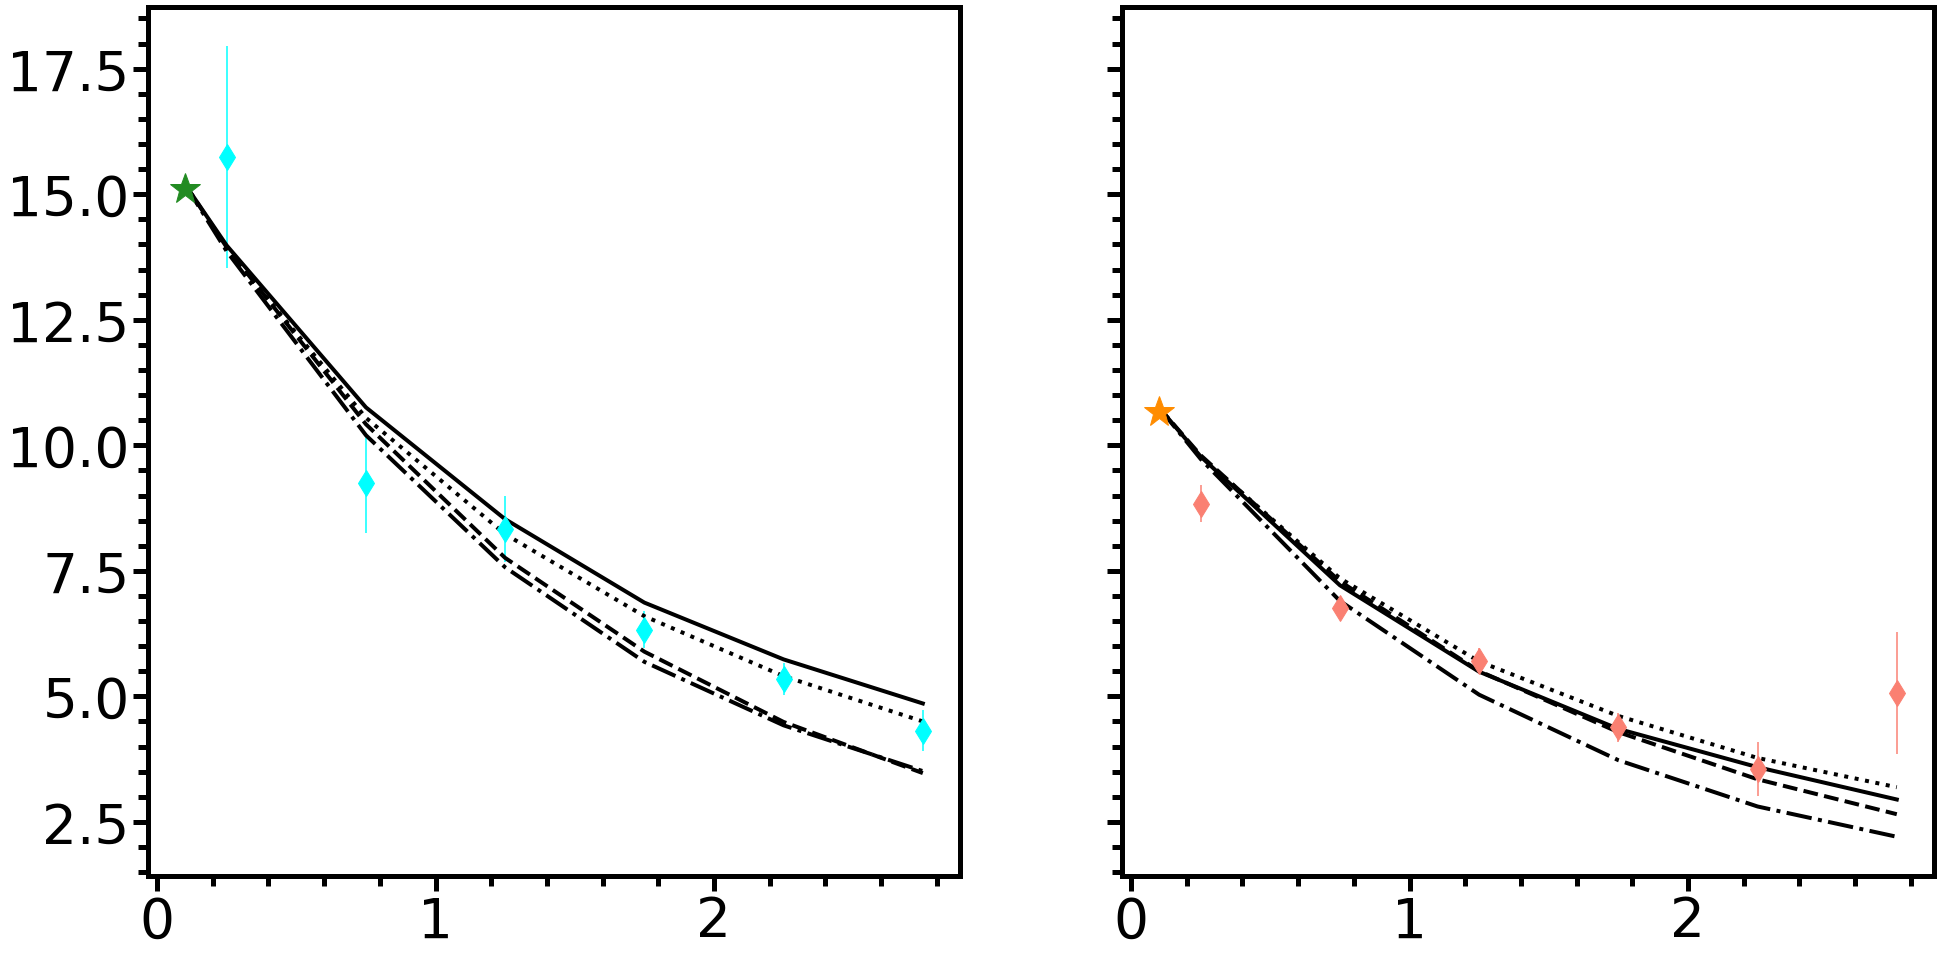

In [42]:
def chi2(yhat,y,sigma):
    return np.sum( ( (yhat-y)/sigma)**2 )


mus = [2]
linestyles = ['-','--',':','-.']


fig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))

redshifts, medSF,sigmaSF = np.loadtxt('/home/lz1f17/PhD/data/Mowla18/Mowla18_Q.txt', unpack=True)

ax[1].errorbar(redshifts, medSF, yerr=sigmaSF, linestyle = 'None', color='salmon', marker='d', label = 'Mowla+19 Q', markersize=18)
#z, med,down,up = np.loadtxt('/home/lz1f17/PhD/data/Faisst17_Data_Figure4/Faisst17_Data_Figure4_quiescent_M4.csv', delimiter=',',skiprows=1,
#                           usecols=(0,1,3,4), unpack=True)
#ax[1].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='red', marker='o', label = 'Faisst+17 Q ', markersize=18)
#z,up, med,down = np.loadtxt('/home/lz1f17/PhD/data/Patel_vdw.dat', unpack=True)
#ax[1].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='magenta', marker='^', label = 'Patel+17 Q', markersize=18)

redshifts, medQ,sigmaQ = np.loadtxt('/home/lz1f17/PhD/data/Mowla18/Mowla18_SF.txt', unpack=True)
ax[0].errorbar(redshifts, medQ, yerr=sigmaQ, linestyle = 'None', color='cyan', marker='d', label = 'Mowla+19 SF', markersize=18)
#z, med,down,up = np.loadtxt('/home/lz1f17/PhD/data/Faisst17_Data_Figure4/Faisst17_Data_Figure4_starforming_M4.csv', delimiter=',',skiprows=1,
#                           usecols=(0,1,3,4), unpack=True)
#ax[0].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='mediumblue', marker='o', label = 'Faisst+17 SF ', markersize=18)

#sigmaQ = np.append((Re_ETGs_low+Re_ETGs_up)/2,  sigmaQ)
#sigmaSF = np.append((Re_LTGs_low+Re_LTGs_up)/2,  sigmaSF)

#medQ = np.append(Re_ETGs, medQ)
#medSF = np.append(Re_LTGs, medSF)

redshifts = np.append([0.1],redshifts)
for ls, (lab,model) in zip(linestyles,dictionary_models.items()):
    for j,mu in enumerate(mus):
        print(ls)
        quench_dict = {'M0':1,'mu':mu}
        Re_SF = []
        Re_Q = []
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            df = df.query('11.2<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            if lab=='model_3' or lab=='model_4':
                A_KSF = 0.0212*1.45
                A_KQ = 0.016
            else :
                A_KSF = 0.0235*1.45
                A_KQ  = 0.0185

            QsizeModel = K13Model(rhalo=Q['Rh'], A_K=A_KQ, sigma_K=0.1 )
            SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=A_KSF, sigma_K=0.1 )
            ReSF = SFsizeModel.to_galaxy_size()
            ReQ = QsizeModel.to_galaxy_size()
            ReSF = SF['Rh'].values+np.log10(A_KSF)
            ReQ = Q['Rh'].values+np.log10(A_KQ)
            
            if i==0:
                if lab=='model_3':
                    save_SF = 10**np.median(ReSF)
                    save_Q = 10**np.median(ReQ)
                    dR_SF = 0
                    dR_Q = 0
                else:
                    dR_SF = 10**np.median(ReSF)-save_SF
                    dR_Q = 10**np.median(ReQ)-save_Q
                        
            Re_SF.append( 10**np.median(ReSF) - abs(dR_SF))
            
            Re_Q.append( 10**np.median(ReQ) -abs(dR_Q))
 
            
        print('star forming:'+lab+' '+str(chi2(Re_SF[1:],medSF,sigmaSF)))
        print('quenched: '+lab+' '+str(chi2(Re_Q[1:],medQ,sigmaQ)))
        ax[0].plot(redshifts,Re_SF, ls=ls, color='black',lw=4)
        ax[1].plot(redshifts,Re_Q, ls=ls, color='black',lw=4)
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)
        
ax[1].errorbar([0.1], Re_ETGs, yerr=[[Re_ETGs_low], [Re_ETGs_up]], color='darkorange', fmt='*', label='SDSS ETGs, trunc', markersize=32)
ax[0].errorbar([0.1], Re_LTGs,  yerr=[[Re_LTGs_low], [Re_LTGs_up]], color='forestgreen', fmt='*', label='SDSS LTGs, trunc', markersize=32)

        
'''
    
fig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))

x = np.arange(1000,1000)

redshifts = [0.1,0.5,1,2,4]
mus=[1,2,4]
for j,(ls,mu) in enumerate(zip(linestyles,mus)):
    quench_dict = {'M0':1,'mu':mu}
    Re_Q = []
    Re_SF =[]
    ax[0].plot(x,x,ls=ls, color='black', lw=4, label='$\mu=${}'.format(mu))
    for i,z in enumerate(redshifts):
        SFgalaxies = Galaxies(z=z,dict_SMHM=dicts_SF[i], quench_dict=quench_dict)
        Qgalaxies = Galaxies(z=z,dict_SMHM=dicts_Q[i], quench_dict=quench_dict)
        
        SF = SFgalaxies.catalog.query("11.1<Mstar<12.1 & TType=='LTGs'")
        Q = Qgalaxies.catalog.query("11.1<Mstar<12.1 & TType=='ETGs'")
    
        QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.016, sigma_K=0.1 )
        SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.0225, sigma_K=0.1 )
        
        ReSF = SFsizeModel.to_galaxy_size()
        Re_SF.append( 10**np.median(ReSF))
        ReQ = QsizeModel.to_galaxy_size()
        Re_Q.append( 10**np.median(ReQ))


    ax[0].plot(redshifts,Re_SF, ls=ls, color='navy',lw=4)
    ax[1].plot(redshifts,Re_Q, ls=ls, color='darkred',lw=4)

        
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[0].set_ylim(2,17)
ax[1].set_ylim(2,17)
        
        
ax[1].errorbar([0.1], Re_ETGs, yerr=[[Re_ETGs_low], [Re_ETGs_up]], color='darkorange', fmt='*', label='SDSS ETGs, trunc', markersize=32)
ax[0].errorbar([0.1], Re_LTGs,  yerr=[[Re_LTGs_low], [Re_ELGs_up]], color='forestgreen', fmt='*', label='SDSS LTGs, trunc', markersize=32)

leg1 = ax[0].legend(fontsize=20, loc='center right')
leg1_2 = ax[1].legend( fontsize=20, loc='center right')


#lines = [Line2D([0], [0], color='black', linewidth=4, linestyle=ls) for ls in linestyles]
#labels = [f'model {mod}:'+r'$A_K\approx$'+f'{ak}' for mod, ak in zip([1,2,3,4],[0.03,0.03,0.028,0.028])]

#leg2 = ax1.legend(lines, labels, loc='upper right',  fontsize=30)    
#ax1.add_artist(leg1)
#ax1.add_artist(leg2)

#labels = [f'model {mod}:'+r'$A_K\approx$'+f'{ak}' for mod, ak in zip([1,2,3,4],[0.018,0.018,0.015,0.015])]
#leg2_2 = ax2.legend(lines, labels, loc='upper right',  fontsize=30)    
#ax2.add_artist(leg1_2)
#ax2.add_artist(leg2_2)



ax[0].set_xlabel('z', fontsize=50)
ax[1].set_xlabel('z', fontsize=50)
ax[0].set_ylabel(r'$\langle R_e \rangle \ [kpc]$', fontsize=50)
ax[0].set_title('Star forming')
ax[1].set_title('Quiescent')
ax[0].text(0.3,3, '$A_{K,SF}=0.023$', fontsize=45)
ax[1].text(0.3,3, '$A_{K,Q}=0.016$', fontsize=45)
for a in ax:
    a.xaxis.set_ticks_position("both")
    a.yaxis.set_ticks_position("both")
ax[0].legend(frameon=False, fontsize=30)
fig.tight_layout()'''

# for Moster

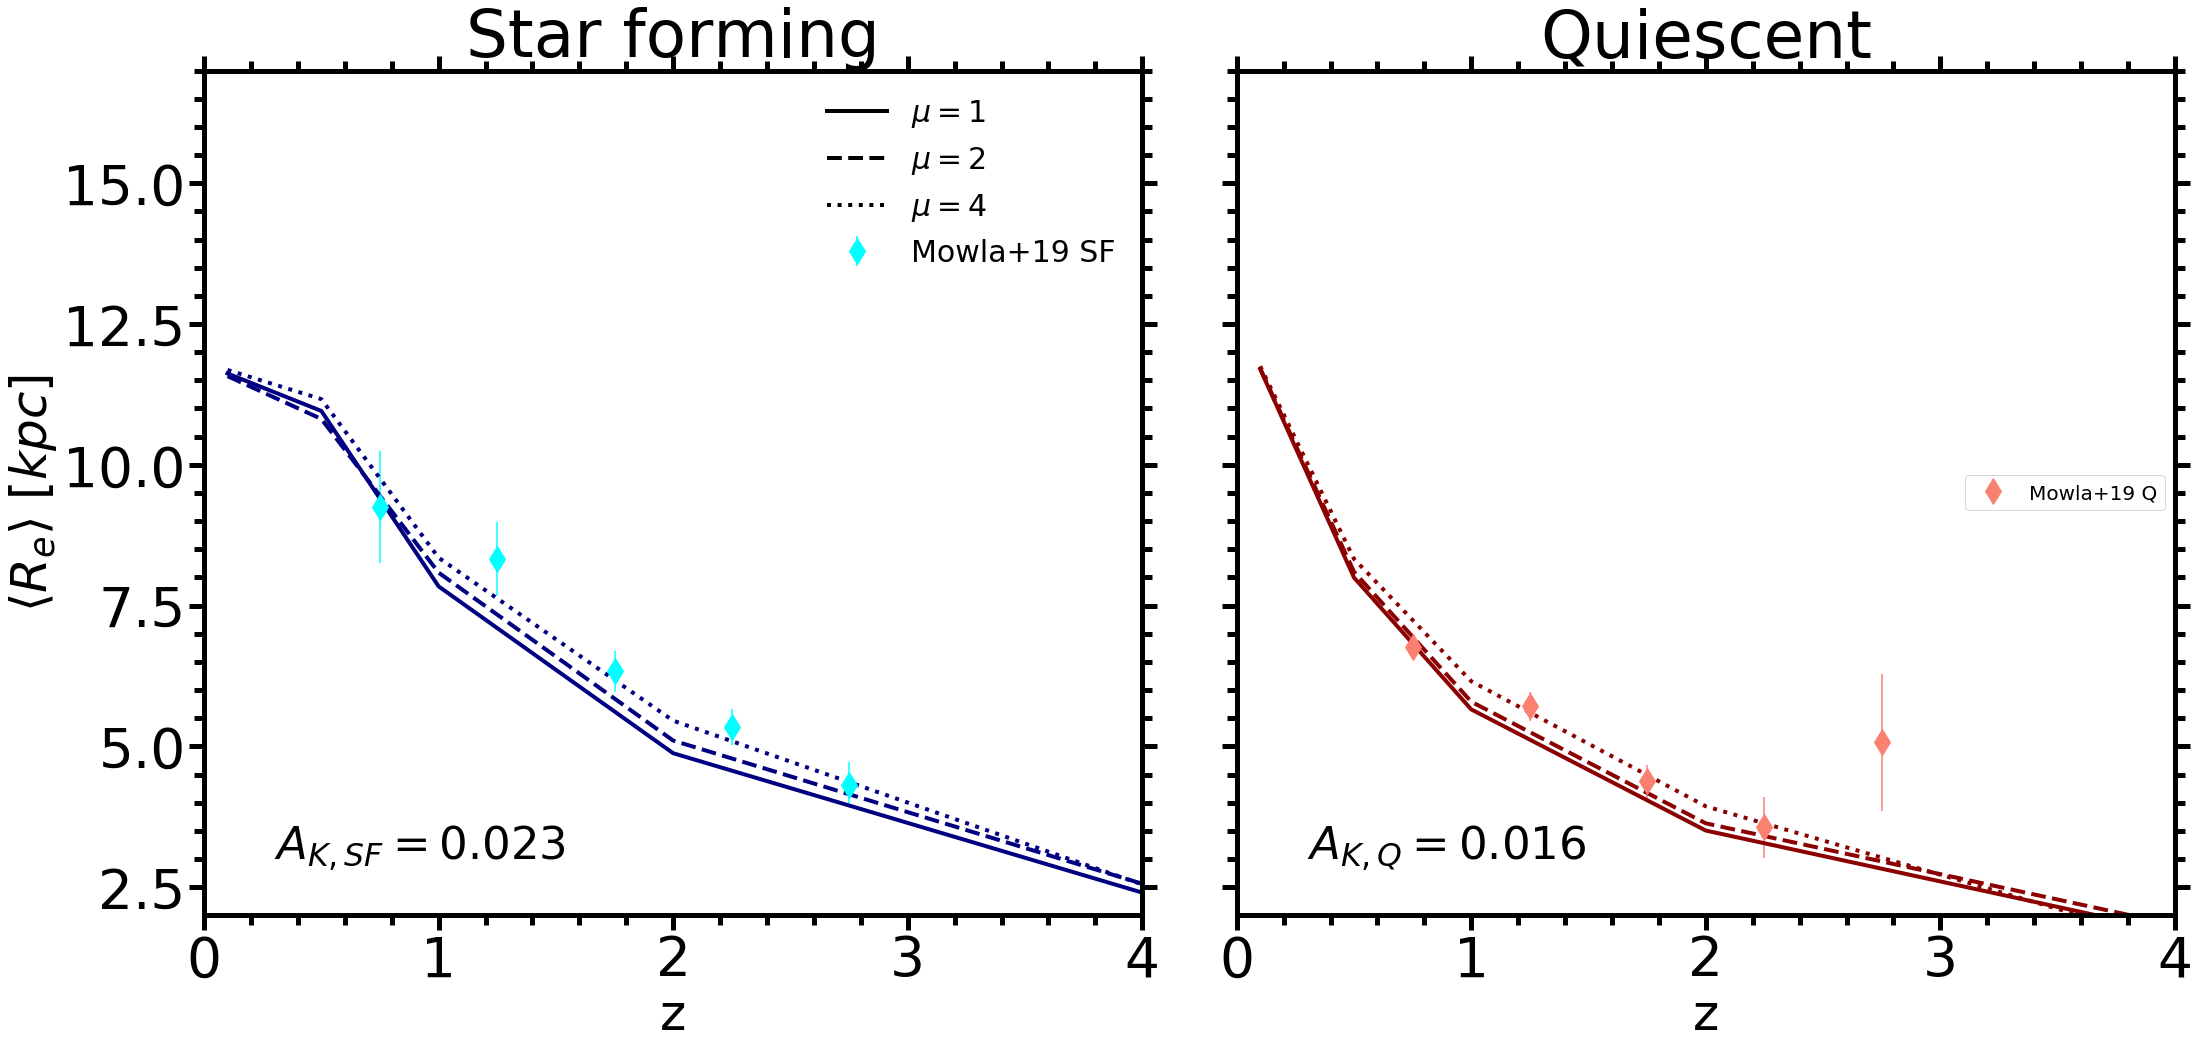

In [78]:
mus = [2]
linestyles = ['-','--',':','-.']



redshifts, med,sigma = np.loadtxt('/home/lz1f17/PhD/data/Mowla18/Mowla18_Q.txt', unpack=True)
ax[1].errorbar(z[1:], med[1:], yerr=sigma[1:], linestyle = 'None', color='salmon', marker='d', label = 'Mowla+19 Q', markersize=18)
#z, med,down,up = np.loadtxt('/home/lz1f17/PhD/data/Faisst17_Data_Figure4/Faisst17_Data_Figure4_quiescent_M4.csv', delimiter=',',skiprows=1,
#                           usecols=(0,1,3,4), unpack=True)
#ax[1].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='red', marker='o', label = 'Faisst+17 Q ', markersize=18)
#z,up, med,down = np.loadtxt('/home/lz1f17/PhD/data/Patel_vdw.dat', unpack=True)
#ax[1].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='magenta', marker='^', label = 'Patel+17 Q', markersize=18)

redshifts, med,sigma = np.loadtxt('/home/lz1f17/PhD/data/Mowla18/Mowla18_SF.txt', unpack=True)
ax[0].errorbar(z[1:], med[1:], yerr=sigma[1:], linestyle = 'None', color='cyan', marker='d', label = 'Mowla+19 SF', markersize=18)
#z, med,down,up = np.loadtxt('/home/lz1f17/PhD/data/Faisst17_Data_Figure4/Faisst17_Data_Figure4_starforming_M4.csv', delimiter=',',skiprows=1,
#                           usecols=(0,1,3,4), unpack=True)
#ax[0].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='mediumblue', marker='o', label = 'Faisst+17 SF ', markersize=18)

'''redshifts=np.append([0.1], np.linspace(0.5,4,7))
fig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))
for ls,model in zip(linestyles,models):
    for j,mu in enumerate(mus):
        print(ls)
        quench_dict = {'M0':1,'mu':mu}
        Re_SF = []
        Re_Q = []
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            df = df.query('11.3<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.018, sigma_K=0.1 )
            SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.03, sigma_K=0.1 )
            
            ReSF = SFsizeModel.to_galaxy_size()
            Re_SF.append( 10**np.median(ReSF))
            ReQ = QsizeModel.to_galaxy_size()
            Re_Q.append( 10**np.median(ReQ))
 
            
        ax[0].plot(redshifts,Re_SF, ls=ls, color='black',lw=4)
        ax[1].plot(redshifts,Re_Q, ls=ls, color='black',lw=4)
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)
'''
    
fig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))

x = np.arange(1000,1000)

redshifts = [0.1,0.5,1,2,4]
mus=[1,2,4]
for j,(ls,mu) in enumerate(zip(linestyles,mus)):
    quench_dict = {'M0':1,'mu':mu}
    Re_Q = []
    Re_SF =[]
    ax[0].plot(x,x,ls=ls, color='black', lw=4, label='$\mu=${}'.format(mu))
    for i,z in enumerate(redshifts):
        SFgalaxies = Galaxies(z=z,dict_SMHM=dicts_SF[i], quench_dict=quench_dict)
        Qgalaxies = Galaxies(z=z,dict_SMHM=dicts_Q[i], quench_dict=quench_dict)
        
        SF = SFgalaxies.catalog.query("11.1<Mstar<12.1 & TType=='LTGs'")
        Q = Qgalaxies.catalog.query("11.1<Mstar<12.1 & TType=='ETGs'")
    
        QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.016, sigma_K=0.1 )
        SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.0225, sigma_K=0.1 )
        
        ReSF = SFsizeModel.to_galaxy_size()
        Re_SF.append( 10**np.median(ReSF))
        ReQ = QsizeModel.to_galaxy_size()
        Re_Q.append( 10**np.median(ReQ))


    ax[0].plot(redshifts,Re_SF, ls=ls, color='navy',lw=4)
    ax[1].plot(redshifts,Re_Q, ls=ls, color='darkred',lw=4)

        
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[0].set_ylim(2,17)
ax[1].set_ylim(2,17)
        
        
#ax[1].errorbar([0.1], Re_ETGs, yerr=[[Re_ETGs_low], [Re_ETGs_up]], color='darkorange', fmt='*', label='SDSS ETGs, trunc', markersize=32)
#ax[0].errorbar([0.1], Re_LTGs,  yerr=[[Re_LTGs_low], [Re_ELGs_up]], color='forestgreen', fmt='*', label='SDSS LTGs, trunc', markersize=32)

leg1 = ax[0].legend(fontsize=20, loc='center right')
leg1_2 = ax[1].legend( fontsize=20, loc='center right')


#lines = [Line2D([0], [0], color='black', linewidth=4, linestyle=ls) for ls in linestyles]
#labels = [f'model {mod}:'+r'$A_K\approx$'+f'{ak}' for mod, ak in zip([1,2,3,4],[0.03,0.03,0.028,0.028])]

#leg2 = ax1.legend(lines, labels, loc='upper right',  fontsize=30)    
#ax1.add_artist(leg1)
#ax1.add_artist(leg2)

#labels = [f'model {mod}:'+r'$A_K\approx$'+f'{ak}' for mod, ak in zip([1,2,3,4],[0.018,0.018,0.015,0.015])]
#leg2_2 = ax2.legend(lines, labels, loc='upper right',  fontsize=30)    
#ax2.add_artist(leg1_2)
#ax2.add_artist(leg2_2)



ax[0].set_xlabel('z', fontsize=50)
ax[1].set_xlabel('z', fontsize=50)
ax[0].set_ylabel(r'$\langle R_e \rangle \ [kpc]$', fontsize=50)
ax[0].set_title('Star forming')
ax[1].set_title('Quiescent')
ax[0].text(0.3,3, '$A_{K,SF}=0.023$', fontsize=45)
ax[1].text(0.3,3, '$A_{K,Q}=0.016$', fontsize=45)
for a in ax:
    a.xaxis.set_ticks_position("both")
    a.yaxis.set_ticks_position("both")
ax[0].legend(frameon=False, fontsize=30)
fig.tight_layout()

-
[array([11.28576097, 11.50332436, 13.28578499]), array([ 9.62636782,  9.86910476, 10.10068284]), array([6.48140873, 7.57737753, 8.21966484]), array([4.89692376, 5.20591616, 5.78271912]), array([3.97134482, 4.37515033, 4.79560638]), array([3.09573118, 3.44991892, 3.6667358 ]), array([2.68781254, 2.92697459, 3.0486422 ]), array([1.78160813, 1.8554747 , 2.45272557])]
--
[array([10.94224067, 11.01927495, 11.8560219 ]), array([8.12954169, 8.87737988, 9.15425344]), array([6.1246811 , 6.7728663 , 6.95196692]), array([4.67106827, 5.00562415, 5.27381612]), array([3.13193327, 3.45669202, 3.6738373 ]), array([2.28251899, 2.36218086, 2.65833659]), array([1.75267694, 1.9466926 , 2.04433852]), array([1.52453117, 1.55259674, 1.6605895 ])]


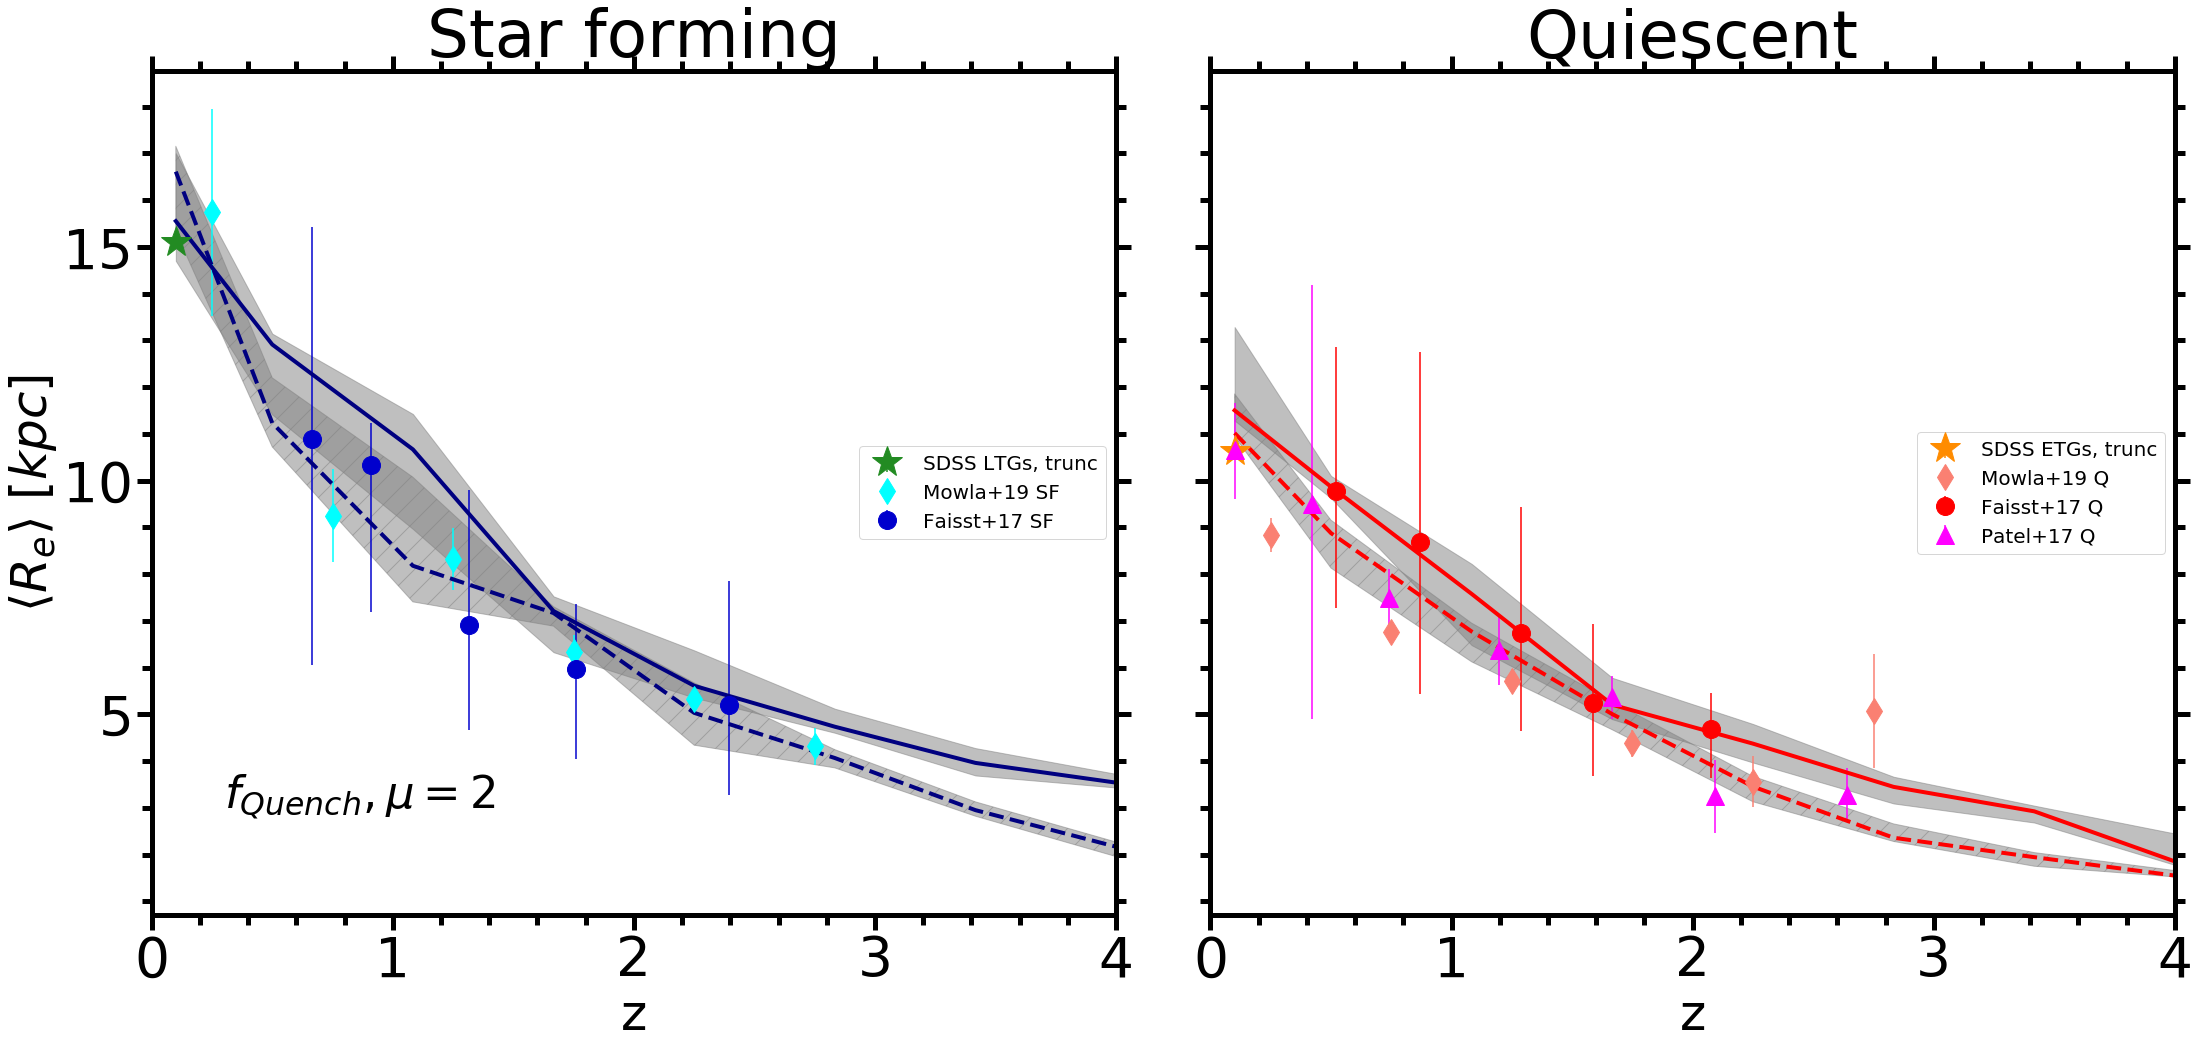

In [69]:
mus = [2]
linestyles = ['-','--',':','-.']

redshifts=np.append([0.1], np.linspace(0.5,3,7))
fig, ax = plt.subplots(1,2, sharey=True, figsize=(32,16))
hatches = [None,'/']
for ls,(hatch,model) in zip(linestyles,zip(hatches,models[:2])):
    for j,mu in enumerate(mus):
        print(ls)
        quench_dict = {'M0':1,'mu':mu}
        Re_SF = []
        Re_Q = []
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            df = df.query('11.2<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            partial_Re_SF = []
            partial_Re_Q = []
            for _ in range(5):
                A_K = 10**np.random.normal(np.log10(0.018),0.10)
                QsizeModel = K13Model(rhalo=Q['Rh'], A_K=A_K, sigma_K=0.1 )
                A_K = 10**np.random.normal(np.log10(0.03),0.10)
                SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=A_K, sigma_K=0.1 )
            
                ReSF = SFsizeModel.to_galaxy_size()
                partial_Re_SF.append(10**np.median(ReSF))
                ReQ = QsizeModel.to_galaxy_size()
                partial_Re_Q.append(10**np.median(ReQ))
                
                
            Re_SF.append( np.percentile(partial_Re_SF,[16,50,84]) )
            Re_Q.append( np.percentile(partial_Re_Q,[16,50,84]) )
            
            
        print(Re_Q)
        Re_SF = np.asarray(Re_SF)
        Re_Q = np.asarray(Re_Q)
        ax[0].plot(redshifts,Re_SF[:,1], ls=ls, color='navy',lw=4)
        ax[1].plot(redshifts,Re_Q[:,1], ls=ls, color='red',lw=4)
        ax[0].fill_between(redshifts, Re_SF[:,0],Re_SF[:,2], color='gray',hatch=hatch, alpha=0.5)
        ax[1].fill_between(redshifts, Re_Q[:,0],Re_Q[:,2], color='gray',hatch=hatch, alpha=0.5)
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)

        
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
        
        
ax[1].errorbar([0.1], Re_ETGs, yerr=[[Re_ETGs_low], [Re_ETGs_up]], color='darkorange', fmt='*', label='SDSS ETGs, trunc', markersize=32)
ax[0].errorbar([0.1], Re_LTGs,  yerr=[[Re_LTGs_low], [Re_ELGs_up]], color='forestgreen', fmt='*', label='SDSS LTGs, trunc', markersize=32)

z, med,sigma = np.loadtxt('/home/lz1f17/PhD/data/Mowla18/Mowla18_Q.txt', unpack=True)
ax[1].errorbar(z, med, yerr=sigma, linestyle = 'None', color='salmon', marker='d', label = 'Mowla+19 Q', markersize=18)
z, med,down,up = np.loadtxt('/home/lz1f17/PhD/data/Faisst17_Data_Figure4/Faisst17_Data_Figure4_quiescent_M4.csv', delimiter=',',skiprows=1,
                           usecols=(0,1,3,4), unpack=True)
ax[1].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='red', marker='o', label = 'Faisst+17 Q ', markersize=18)
z,up, med,down = np.loadtxt('/home/lz1f17/PhD/data/Patel_vdw.dat', unpack=True)
ax[1].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='magenta', marker='^', label = 'Patel+17 Q', markersize=18)

z, med,sigma = np.loadtxt('/home/lz1f17/PhD/data/Mowla18/Mowla18_SF.txt', unpack=True)
ax[0].errorbar(z, med, yerr=sigma, linestyle = 'None', color='cyan', marker='d', label = 'Mowla+19 SF', markersize=18)
z, med,down,up = np.loadtxt('/home/lz1f17/PhD/data/Faisst17_Data_Figure4/Faisst17_Data_Figure4_starforming_M4.csv', delimiter=',',skiprows=1,
                           usecols=(0,1,3,4), unpack=True)
ax[0].errorbar(z, med, yerr=[med-down,up-med], linestyle = 'None', color='mediumblue', marker='o', label = 'Faisst+17 SF ', markersize=18)

leg1 = ax[0].legend(fontsize=20, loc='center right')
leg1_2 = ax[1].legend( fontsize=20, loc='center right')


#lines = [Line2D([0], [0], color='black', linewidth=4, linestyle=ls) for ls in linestyles]
#labels = [f'model {mod}:'+r'$A_K\approx$'+f'{ak}' for mod, ak in zip([1,2,3,4],[0.03,0.03,0.028,0.028])]

#leg2 = ax1.legend(lines, labels, loc='upper right',  fontsize=30)    
#ax1.add_artist(leg1)
#ax1.add_artist(leg2)

#labels = [f'model {mod}:'+r'$A_K\approx$'+f'{ak}' for mod, ak in zip([1,2,3,4],[0.018,0.018,0.015,0.015])]
#leg2_2 = ax2.legend(lines, labels, loc='upper right',  fontsize=30)    
#ax2.add_artist(leg1_2)
#ax2.add_artist(leg2_2)



ax[0].set_xlabel('z', fontsize=50)
ax[1].set_xlabel('z', fontsize=50)
ax[0].set_ylabel(r'$\langle R_e \rangle \ [kpc]$', fontsize=50)
ax[0].set_title('Star forming')
ax[1].set_title('Quiescent')
ax[0].text(0.3,3, '$f_{Quench}, \mu=2$', fontsize=45)
for a in ax:
    a.xaxis.set_ticks_position("both")
    a.yaxis.set_ticks_position("both")
fig.tight_layout()

[       nan 0.31072255 0.30257967 0.27827819 0.25808485 0.2399008
 0.22513253 0.21257309 0.20132473 0.1934796  0.18530337 0.1806267
 0.17674302 0.17324443 0.17139382 0.16963992 0.16740413 0.16438545
 0.16595257 0.16374498 0.16483362 0.1632146  0.16333447 0.16358505
 0.16135888 0.15915997 0.15627725 0.15798552 0.16254555 0.15868397
 0.15869285 0.1617535  0.1579022  0.1659288  0.15938594 0.15350059
 0.17069534 0.16942348 0.17218158]


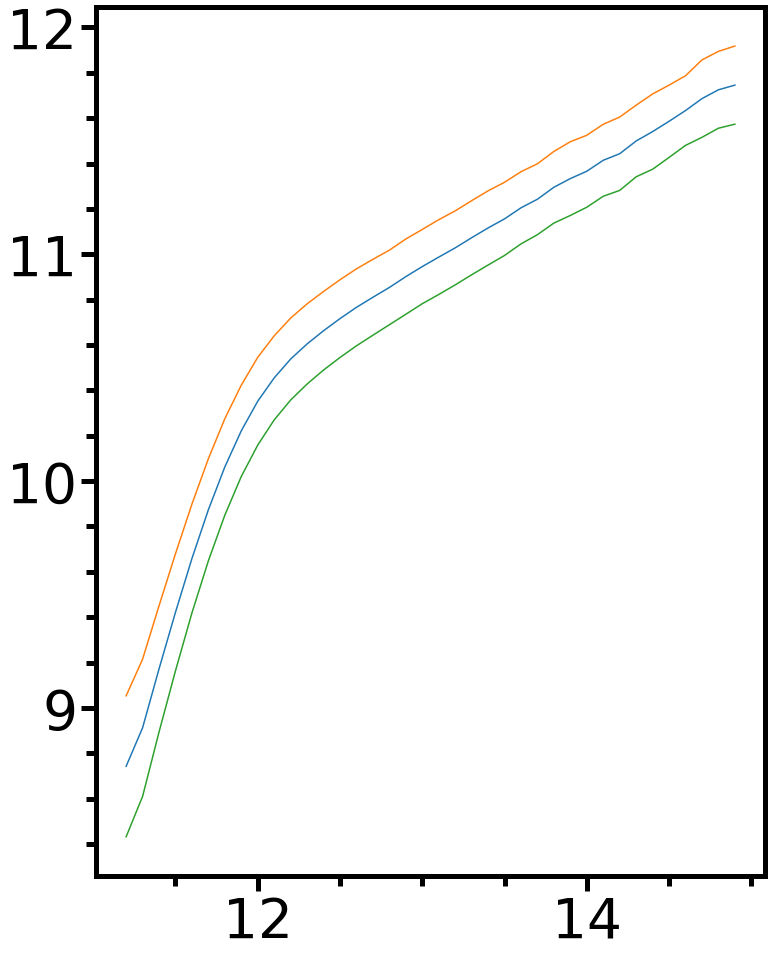

In [46]:
from scipy.stats import binned_statistic
galaxies = Galaxies(dict_SMHM=dicts_all[0],z=0.1)
catalog = galaxies.catalog
bins = np.arange(11,15,0.1)
mean,_,_ = binned_statistic(catalog['Mpeak'], catalog['Mstar'], bins=bins)
s,_,_ = binned_statistic(catalog['Mpeak'], catalog['Mstar'], bins=bins, statistic=np.std)

plt.plot(bins[1:],mean)
plt.plot(bins[1:],mean+s)
plt.plot(bins[1:],mean-s)

print(s)

here
here (554, 3)


(array([0.19963702, 0.70780399, 1.37931034, 2.48638838, 2.48638838,
        1.43375681, 1.01633394, 0.23593466, 0.03629764, 0.        ,
        0.01814882, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
        -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
        -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1]),
 <a list of 1 Patch objects>)

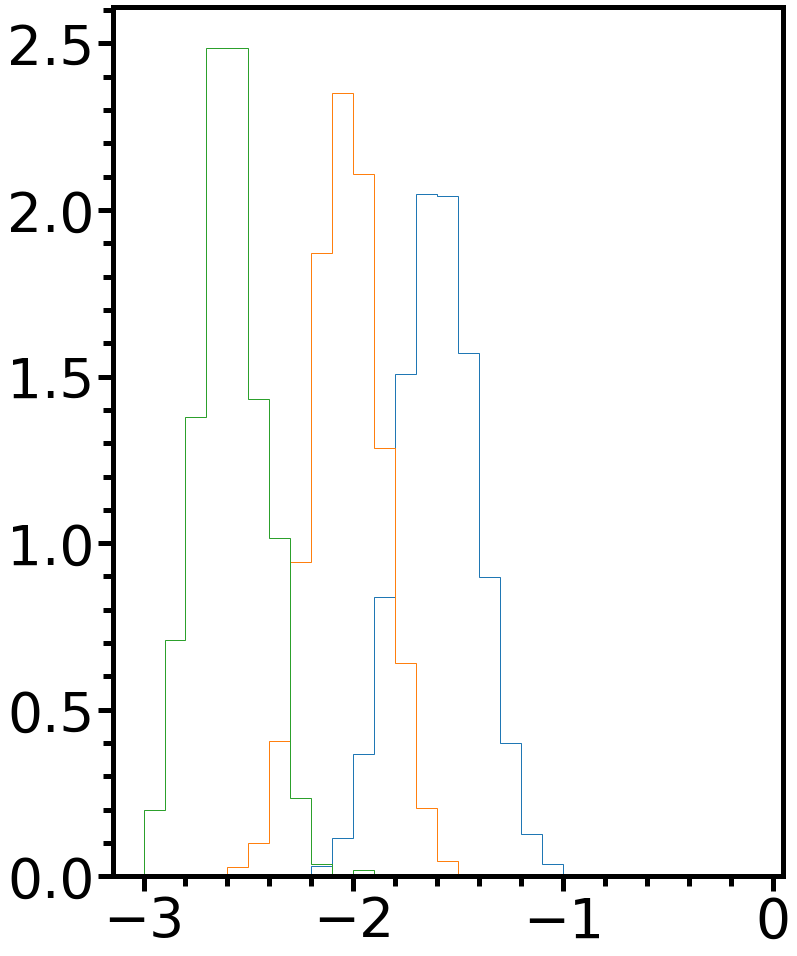

In [183]:
galaxies = Galaxies(z=0.1,dict_SMHM=dicts_all[0])
cat = galaxies.catalog
bins = np.arange(-3,0,0.1)
low = cat.query('Mpeak<11.5')
Y = low['Mstar']-low['Mpeak']
#plt.hist(Y,bins=bins,density=True,histtype='step')
low = cat.query('11.9<Mpeak<12.1')
Y = low['Mstar']-low['Mpeak']
plt.hist(Y,bins=bins,density=True,histtype='step')
low = cat.query('12.9<Mpeak<13.1')
Y = low['Mstar']-low['Mpeak']
plt.hist(Y,bins=bins,density=True,histtype='step')
low = cat.query('13.9<Mpeak<14.1')
print('here',low.shape)
Y = low['Mstar']-low['Mpeak']
plt.hist(Y,bins=bins,density=True,histtype='step')

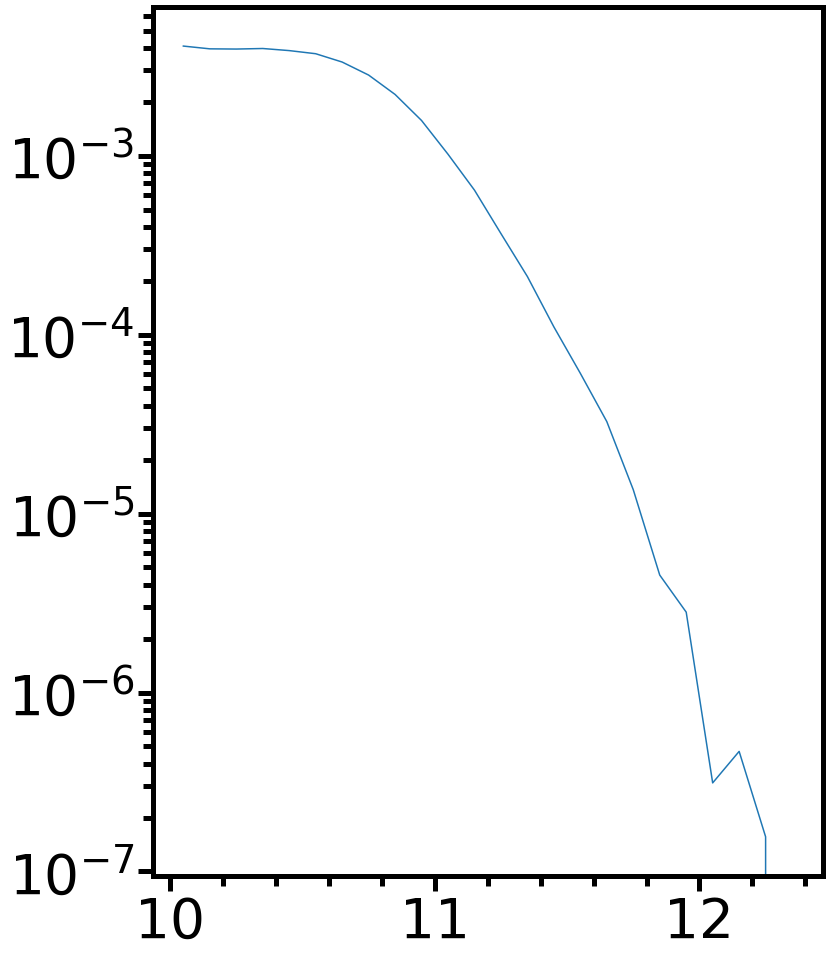

In [184]:
b = np.arange(10,12.5,0.1)
h = np.histogram(cat['Mstar'],bins=b)[0]
Vol=(400)**3
plt.plot(b[1:]-0.10, h/Vol/0.1)
plt.yscale('log')

In [157]:
h

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])